# Feasible Action-Space Reduction <br> as a metric for Causal Responsibility <br> in Multi-Agent Spatial Interactions
---


- The following notebook can be used to run GWorld simulations and to evaluate the FeAR values in each instance. 

# Imports and Setup

In [1]:
%%capture

# Enable interactive plot
# %matplotlib notebook
# %matplotlib qt5 
%matplotlib inline


import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme(style="ticks")
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation,ArtistAnimation
import matplotlib.animation as animation
import copy
from scipy.stats import entropy as entropy
from tqdm import tqdm
rng = np.random.default_rng(seed=0)
import json
import pprint
import datetime
import os


import GWorld
import Agent
import Responsibility
import Emergence
import PlotGWorld
plotgw = PlotGWorld.PlotGWorld(); # Object for accessing plotters

import AnalysisOf_FeAR_Sims as FeARUI

# Basic Settings
  `ShowPlots4Instance` - Whether plots to be made for instance of the simulation (Might increase runtime).
        
  `SaveRecords` - Whether resocds of the simulation are to be saved or discared.

In [2]:
ShowPlots4Instance = True
# ShowPlots4Instance = False

# SaveRecords = True
SaveRecords = False

SaveImagestoFolder = 'GW_Snaps'

# Select the Scenario for the simulation
- Scenarios describe the map of the gworld and location and behaviour of agents
- Scenarios are stored in `Scenarios4FeARSims.json`
- `Scenarios4FeARSims.json` already contains a collection of scenarios. The commands to select these scenarios are included below.
- Uncomment the relevant lines to select the scenario for the simulation.
- When selecting **Scenarios** from the cell below:
    - Don't forget to comment out the block which initialises the settings for the **Case Studies** in the paper.
    - Select **Moves de Rigeuer** (refer cell below.)
    - Specify whether to use **Exhaustive Actions** ( refer cell below.)
- To generate new scenarios, use the notebook `ScenarioBuilder.ipynb`


> *To run the Simulations for the Case Studies in the 2023 ECAI publication* <br>
> *refer to the Section **"Case Studies from the ECAI 2023 paper"** below.*

In [3]:
# Selecting the scenario

# Scenarios in 'Scenarios4FeARSims.json'
# ---------------------------------------
scenario_name= 'DoubleLane-2Agents-5Cases'
# scenario_name= 'DoubleLane-2Agents-5Cases-5Iterations'
# scenario_name= 'Intersection-3Agents'
# scenario_name= 'Intersection-3Agents-100Cases-1Iteration'
# scenario_name= 'Intersection-3Agents-100Cases-3Iterations'
# scenario_name= 'Intersection-3Agents-Tight'
# scenario_name= 'Map-2Agents-50Cases-10Iterations'
# scenario_name= 'Map-5Agents-50Cases-10Iterations'
# scenario_name= 'SingleLane'
# scenario_name= 'SingleLane-2Agents'
# scenario_name= 'SingleLane-2Agents-5Cases'
# scenario_name= 'SingleLane-2Agents-Length10'
# scenario_name= 'SingleLane-2Agents-Length10-AgentsAt-3-5'
# scenario_name= 'SingleLane-2Agents-Length10-AgentsAt-3-5-100Cases'
# scenario_name= 'SingleLane-2Agents-Length10-AgentsAt-3-8'
# scenario_name= 'SingleLane-2Agents-Length10-AgentsAt-3-8-100Cases'
# scenario_name= 'SingleLane-2Agents-Length5'
# scenario_name= 'SingleLane-3Agents-50Cases-10Iterations'
# scenario_name= 'SingleLane-4Agents-50Cases-10Iterations'
# scenario_name= 'SingleLane-8Agents'
# scenario_name= 'SingleLane-8Agents-5iterations'
# scenario_name= 'SingleLane-8Agents-5iterations-5cases'
# scenario_name= 'SingleLane-8Agents-Bidirectional'
# scenario_name= 'SingleLane10-2Agents-AgentsAt-3-5'
# scenario_name= 'SingleLane10-2Agents-AgentsAt-3-8'
# scenario_name= 'SingleLane10-4Agents'
# scenario_name= 'SingleLane10-4Agents-2Way'
# scenario_name= 'SingleLane20-8Agents'
# scenario_name= 'SingleLane20-8Agents-2Way'
# scenario_name = 'GameMap'

# Scenarios suitable for using Exhaustive Actions
# -----------------------------------------------
# scenario_name = 'SingleLane10-2Agents-AgentsAt-3-5'
# scenario_name = 'SingleLane10-2Agents-AgentsAt-3-8'
# scenario_name = 'Intersection-3Agents'
# scenario_name = 'Intersection-3Agents-Tight'



# Select the Moves de Rigueur
Use this cell to set:
- `MdR4Agents_Default`
- `Specific_MdR4Agents`

In [4]:
# Setting the Moves de Rigeuer

# Default MdR for all the agents
# ----------------------------
MdR4Agents_Default = 0 #Stay
# MdR4Agents_Default = 4 #Right1
# MdR4Agents_Default = 8 #Right2
# MdR4Agents_Default = 12 #Right3
# MdR4Agents_Default = 16 #Right4


# Define specific MdR for specific Agents
# Syntax: Specific_MdR4Agents = [[AgentID,MDR], [AgentID,MdR], ...]
# ------------------------------------------------------------------
Specific_MdR4Agents = [] #None
# Specific_MdR4Agents = [[2,0]] #Stay
# Specific_MdR4Agents = [[2,6]] #Down2


# Exhaustive Actions

In [5]:
# # Set whether to consider all combinations of actions for the agents

# ExhaustiveActions = True
ExhaustiveActions = False

# Case Studies from the ECAI 2023 paper
The following cell defines the settings for the case studies used in the paper (and in the appendix).

- To run the simulation, uncomment the settings for the relevant Case :
    - `scenario_name`
    - `ExhaustiveActions`
    - `MdR4Agents_Default`
    - `Specific_MdR4Agents`
    
 **WARNING!**
 - **Uncommenting cases below will override the settings set above.**
 - **If you want to use the settings above, comment out the lines in the following cell.**

In [6]:
# Scenarios and MdRs for the Cases in the paper (ECAI 2023)

# Case Study 1
# -------------

# scenario_name = 'SingleLane10-2Agents-AgentsAt-3-5'
# ExhaustiveActions = True
# MdR4Agents_Default = 0 #Stay
# Specific_MdR4Agents = [] #None




# # Case Study 2
# # -------------

# # Scenario 1 : S0-S0 - Repeated from Case Study 1
# scenario_name = 'SingleLane10-2Agents-AgentsAt-3-5' 
# ExhaustiveActions = True
# MdR4Agents_Default = 0 #Stay
# Specific_MdR4Agents = [] #None

# # Scenario 2 : R1-R1
# scenario_name = 'SingleLane10-2Agents-AgentsAt-3-5'
# ExhaustiveActions = True
# MdR4Agents_Default = 4 #Right1
# Specific_MdR4Agents = [] #None


# # Scenario 3 : R2-R2
# scenario_name = 'SingleLane10-2Agents-AgentsAt-3-5'
# ExhaustiveActions = True
# MdR4Agents_Default = 8 #Right2
# Specific_MdR4Agents = [] #None




# # Case Study 3
# # -------------

# # Scenario 1 : S0-S0-S0
# scenario_name = 'Intersection-3Agents'
# ExhaustiveActions = True
# MdR4Agents_Default = 0 #Stay
# Specific_MdR4Agents = [] #None


# # Scenario 2 : S0-S0-D2 - Appendix
# scenario_name = 'Intersection-3Agents'
# ExhaustiveActions = True
# MdR4Agents_Default = 0 #Stay
# Specific_MdR4Agents = [[2,6]] #Down2


# # Scenario 2 : R2-R2-S0 - Appendix
# scenario_name = 'Intersection-3Agents'
# ExhaustiveActions = True
# MdR4Agents_Default = 8 #Right2
# Specific_MdR4Agents = [[2,0]] #Stay


# # Scenario 2 : R4-R4-S0 - Appendix
# scenario_name = 'Intersection-3Agents'
# ExhaustiveActions = True
# MdR4Agents_Default = 16 #Right4
# Specific_MdR4Agents = [[2,0]] #Stay




# # Case Study 4
# # -------------

# # Scenario 1 : S0-S0-S0-S0
# scenario_name = 'SingleLane10-4Agents'
# ExhaustiveActions = False
# MdR4Agents_Default = 0 #Stay
# Specific_MdR4Agents = [] #None



## All inputs finalized !

---

---


# Running GWorld

- All the relevant settings have been set in the preceding cells.
- **All the following cells can be run altogether.** 

In [7]:
# Get Scenarios from JSON file

Scenario = GWorld.LoadJsonScenario(json_filename='Scenarios4FeARSims.json',scenario_name=scenario_name)


N_Agents = Scenario['N_Agents']
N_Cases = Scenario['N_Cases']
N_iterations = Scenario['N_iterations']

# Just a check - Minimum one iteration
if N_iterations <= 0:
    N_iterations = 1

ActionNames,ActionMoves = Agent.DefineActions()

print('N_Agents : ',N_Agents)
print('N_Cases : ',N_Cases)
print('N_iterations : ',N_iterations)

N_Agents :  2
N_Cases :  5
N_iterations :  1


In [8]:
# Saving Records of Scenarios

# Scenario Records
Record = {'Scenario':Scenario}

Record['Scenario']['AgentLocations'] = np.array(Scenario['AgentLocations']).tolist().copy()

print(Record)

{'Scenario': {'AgentLocations': [], 'DirectionWeights': [0, 0, 1, 1], 'Map': {'OneWays': [], 'Region': [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], 'Walls': []}, 'N_Agents': 2, 'N_Cases': 5, 'N_iterations': 0, 'SpecificAction4Agents': [], 'SpecificDirectionWeights4Agents': [], 'SpecificStepWeights4Agents': [], 'StepWeights': [1, 1, 1, 1, 1], 'defaultAction': 'random'}}


In [9]:
# Exhaustive Action Selection for Agents
if ExhaustiveActions:
    n_actions4agents = np.zeros(N_Agents).astype(int)
    actionIDs4agents = np.empty(N_Agents,dtype=list)
    
    
    StepWeights=Scenario['StepWeights']
    DirectionWeights=Scenario['DirectionWeights']

    ListOfStepWeights = []
    ListOfDirectionWeights = []

    for ii in range(N_Agents):
        ListOfStepWeights.append(StepWeights)
        ListOfDirectionWeights.append(DirectionWeights)


    # Updating the list of stepweights based on specific weights for agents    
    for agentIDs,stepweights4agents in Scenario['SpecificStepWeights4Agents']:
        for agentID in agentIDs:
            ListOfStepWeights[agentID] = stepweights4agents

    # Updating the list of directionweights based on specific weights for agents            
    for agentIDs,directionweights4agents in Scenario['SpecificDirectionWeights4Agents']:
        for agentID in agentIDs:
            ListOfDirectionWeights[agentID] = directionweights4agents
    
    # Accounting for step and direction weights
    for agent in range(N_Agents):
        p_actions = Agent.GeneratePolicy(StepWeights = ListOfStepWeights[agent],
                                 DirectionWeights=ListOfDirectionWeights[agent])
        # The actions with the non-zero probabilities are the actions to be chosen
        n_actions4agents[agent] = np.count_nonzero(p_actions)
        actionIDs4agents[agent] = np.flatnonzero(p_actions).tolist()
        
    
    
    # Agents with Specific Actions only need that action
    for agent, action in Scenario['SpecificAction4Agents']:
        n_actions4agents[agent] = 1
        actionIDs4agents[agent] = [action]
    
    actionIDs4agents = actionIDs4agents.tolist()
    
    print('Number of actions per agent: ', n_actions4agents )
    print('Actions for agents: ', actionIDs4agents )
    
    N_Cases_ex = np.prod(n_actions4agents)
    print('Number of cases need for exhaustively going through the actions :',N_Cases_ex )
    
    actions4agents_mesh = np.array(np.meshgrid(*actionIDs4agents)).T.reshape(-1,N_Agents)

    print('Length of mesh: ',len(actions4agents_mesh))
    # print('Mesh :', actions4agents_mesh)

    if N_Cases_ex < N_Cases+100: 
        N_Cases = N_Cases_ex
        N_iterations = 1

        Record['Scenario']['N_Cases'] = int(N_Cases)
        Record['Scenario']['N_iterations'] = N_iterations

    else:
        print('Too many cases for exhaustively going through all actions.')
        ExhaustiveActions = False

# Running GWorld Instances for the Scenario

- Simulation run for `N_Cases`.
- Each case consists of a sequence of `N_iterations`.
- $\therefore$ Total number of instances per scenario = `N_Cases` $\times$ `N_iterations`

**WARNING!** - The following is the cell that requires the longest to run.


SpecificAction4Agents : []
MdR4Agents :  [[0, 0], [1, 0]]
MdRs:  S0-S0
Instance :  Instance_0
---------------------------------------------

SpecificAction Inputs 4Agents : []
Actions chosen for Agents : [(0, 8), (1, 12)]


100%|████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 443.37it/s]


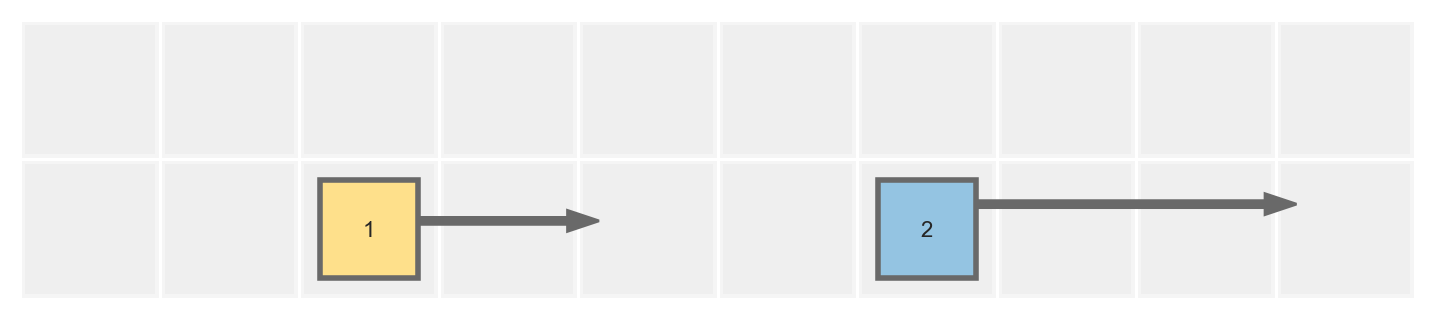

Agent: 1 Action Right2 8
Agent: 2 Action Right3 12


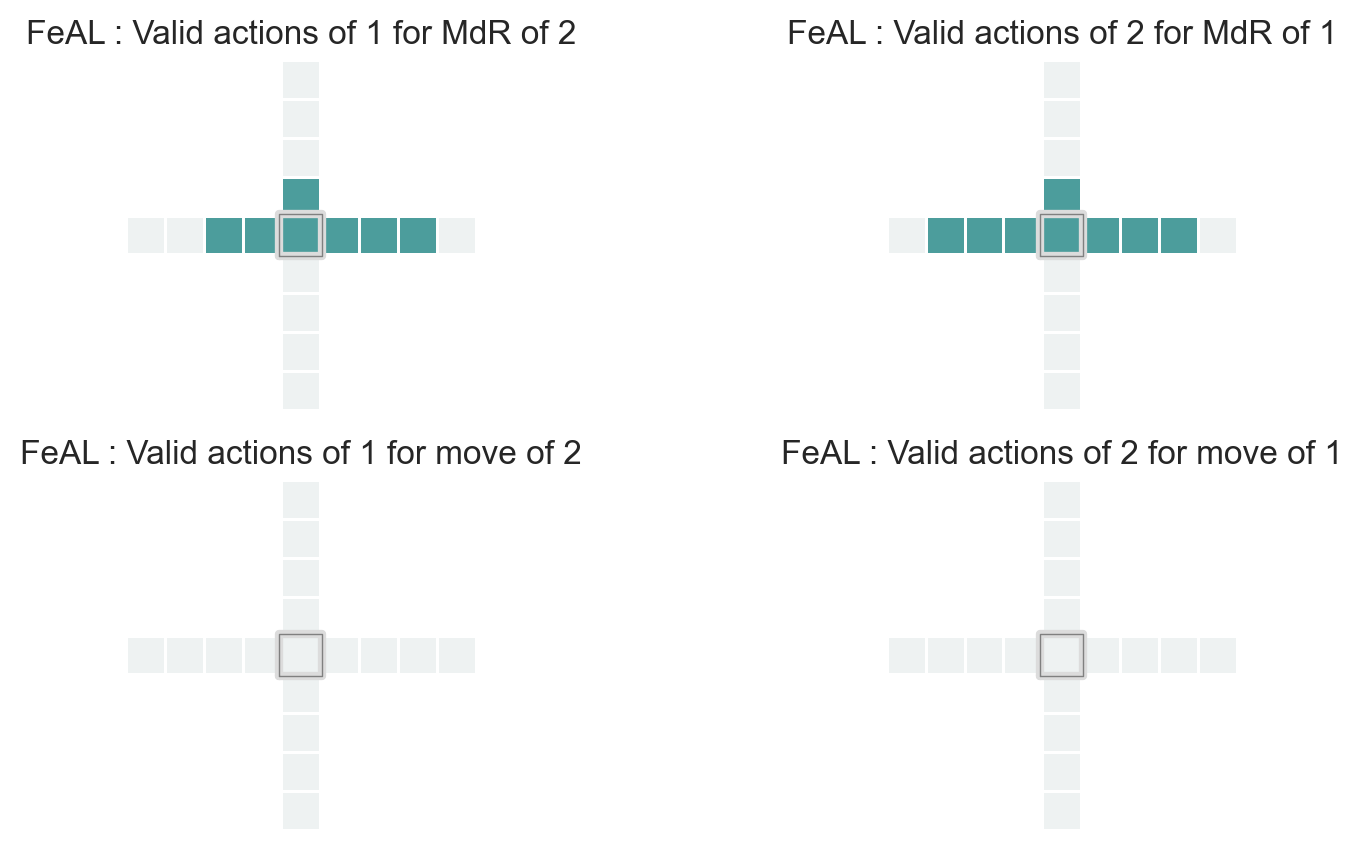

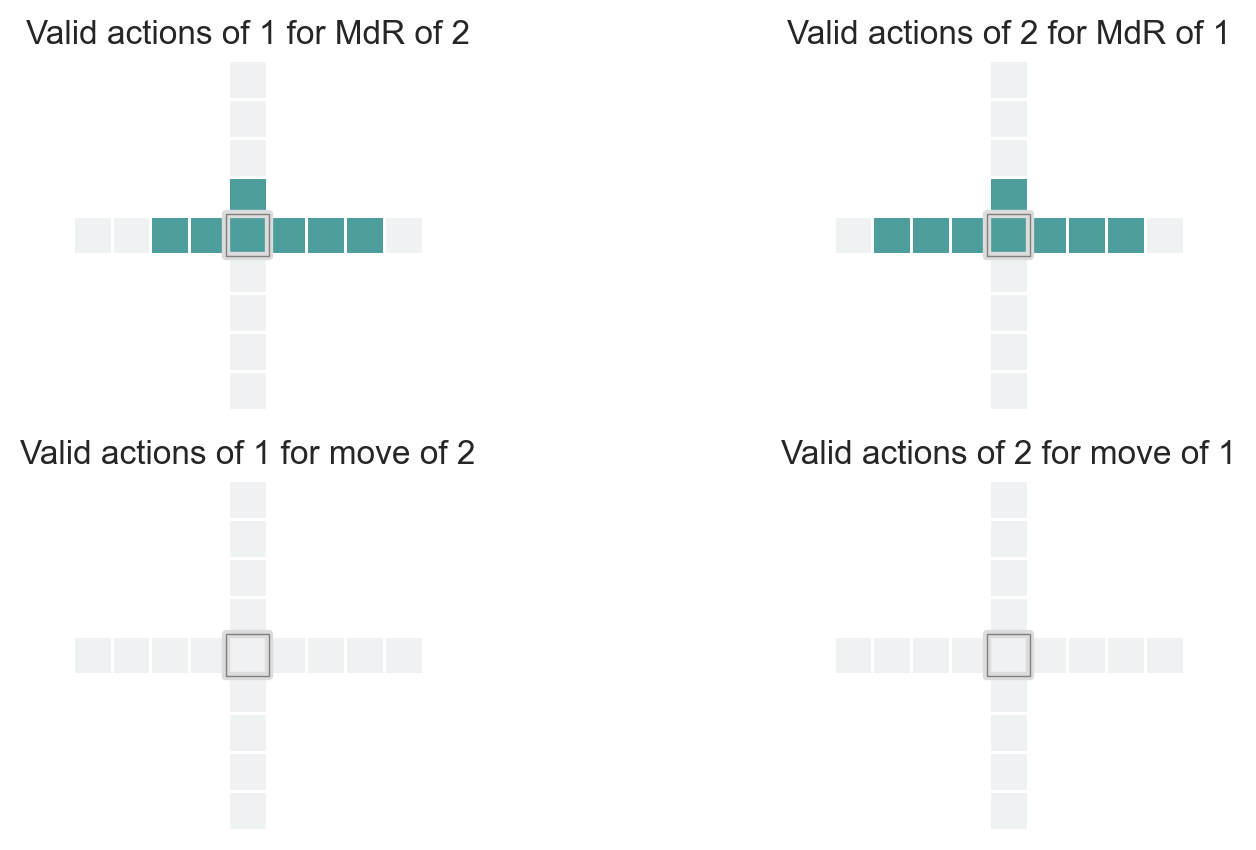

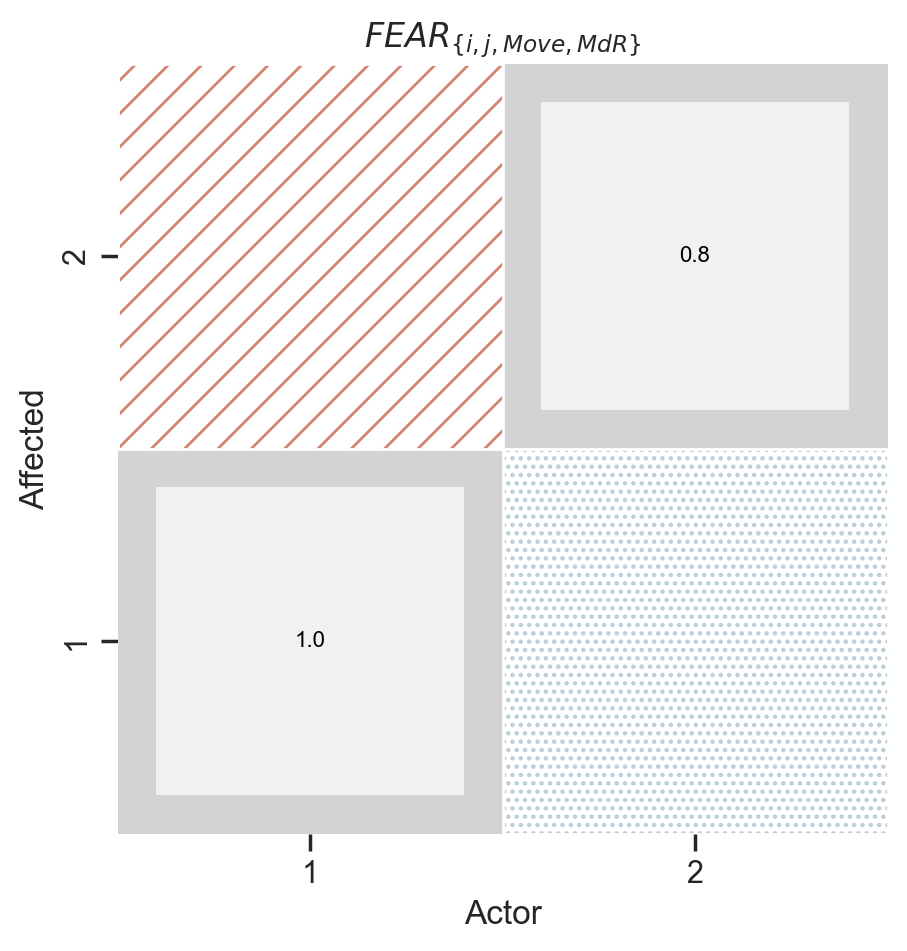

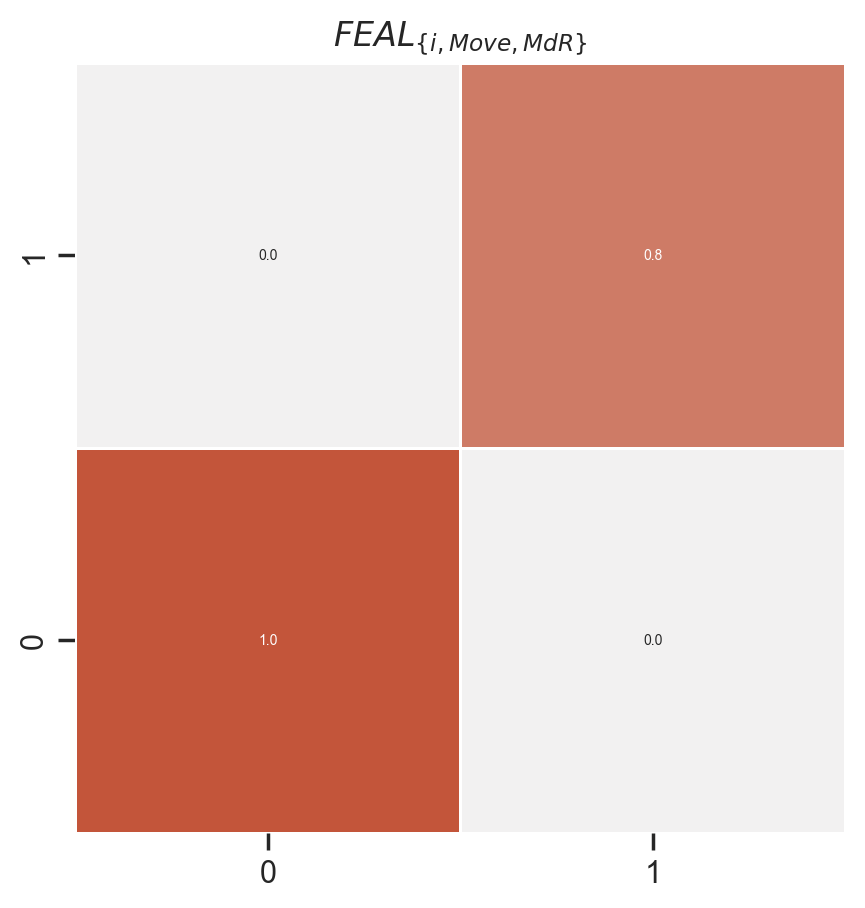

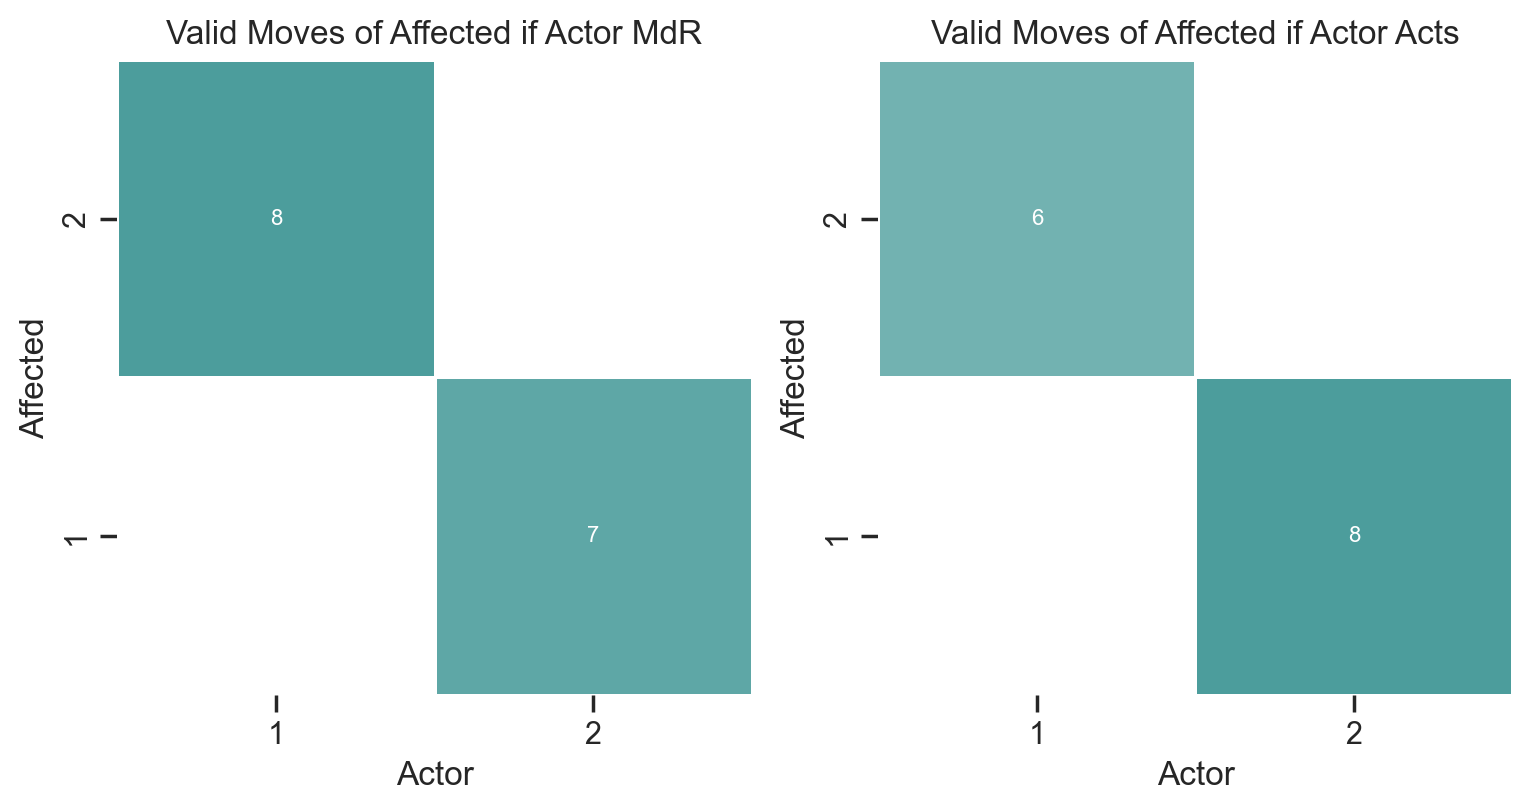

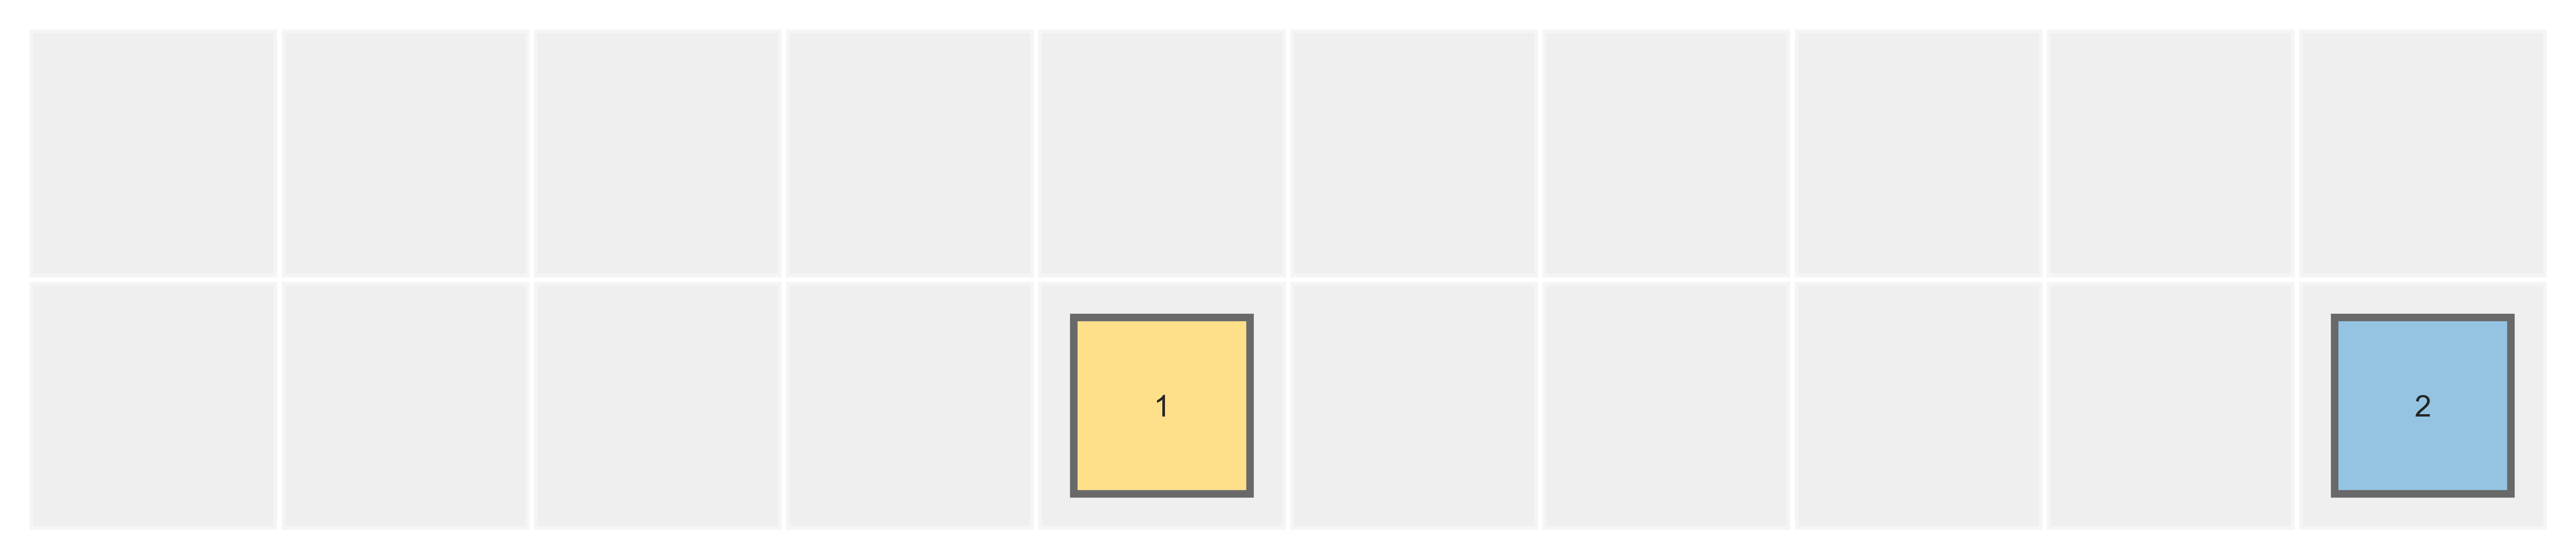

SpecificAction4Agents : []
MdR4Agents :  [[0, 0], [1, 0]]
MdRs:  S0-S0
Instance :  Instance_1
---------------------------------------------

SpecificAction Inputs 4Agents : []
Actions chosen for Agents : [(0, 11), (1, 8)]


100%|████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 489.36it/s]


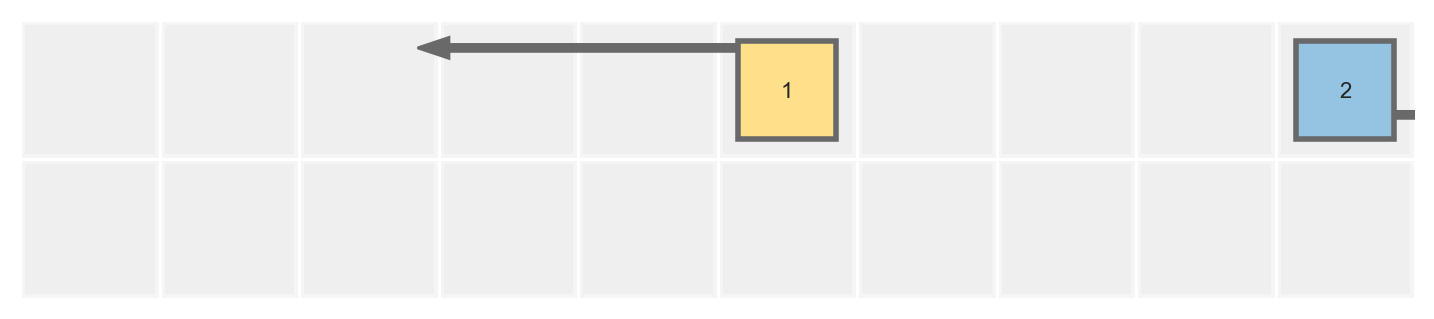

Agent: 1 Action Left3 11
Agent: 2 Action Right2 8


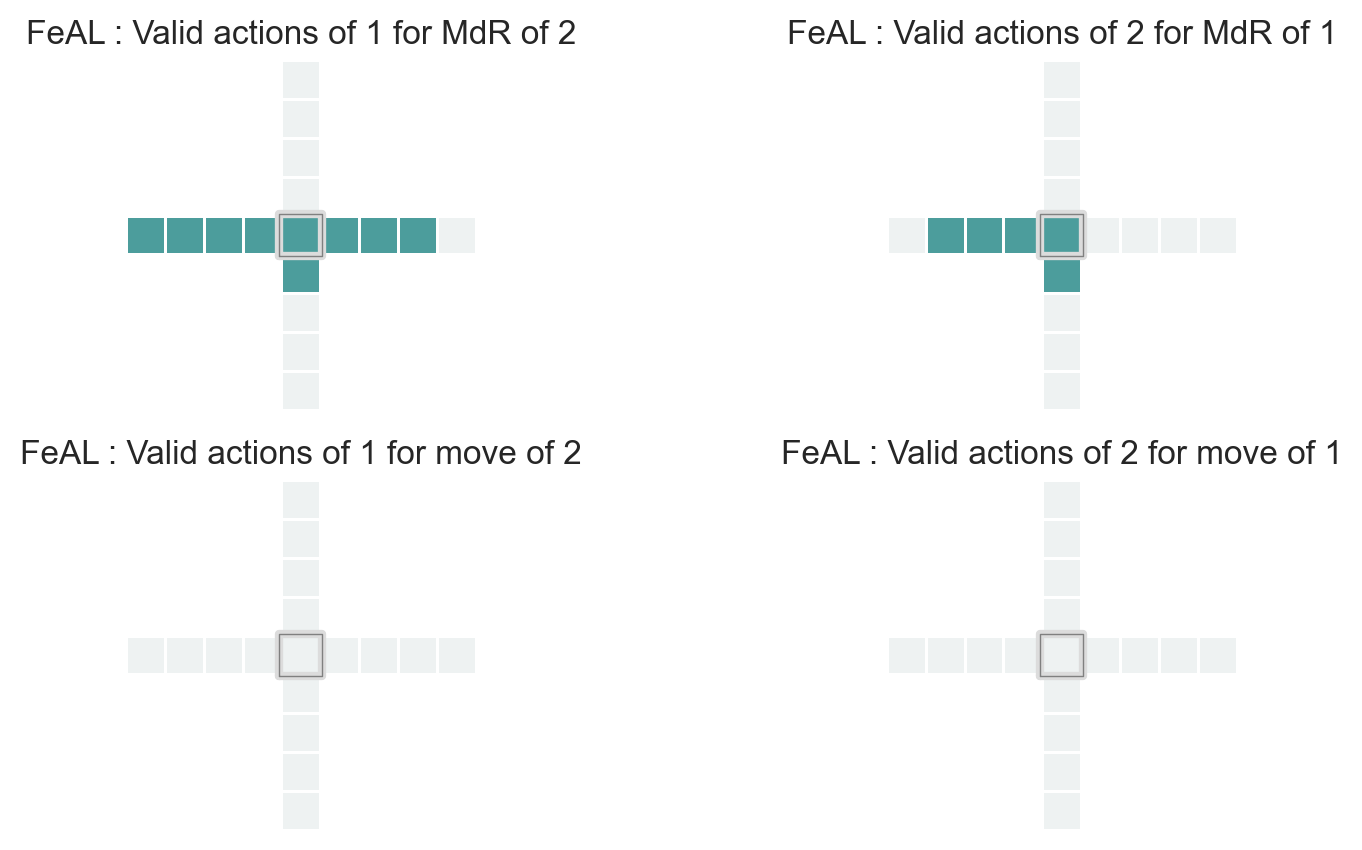

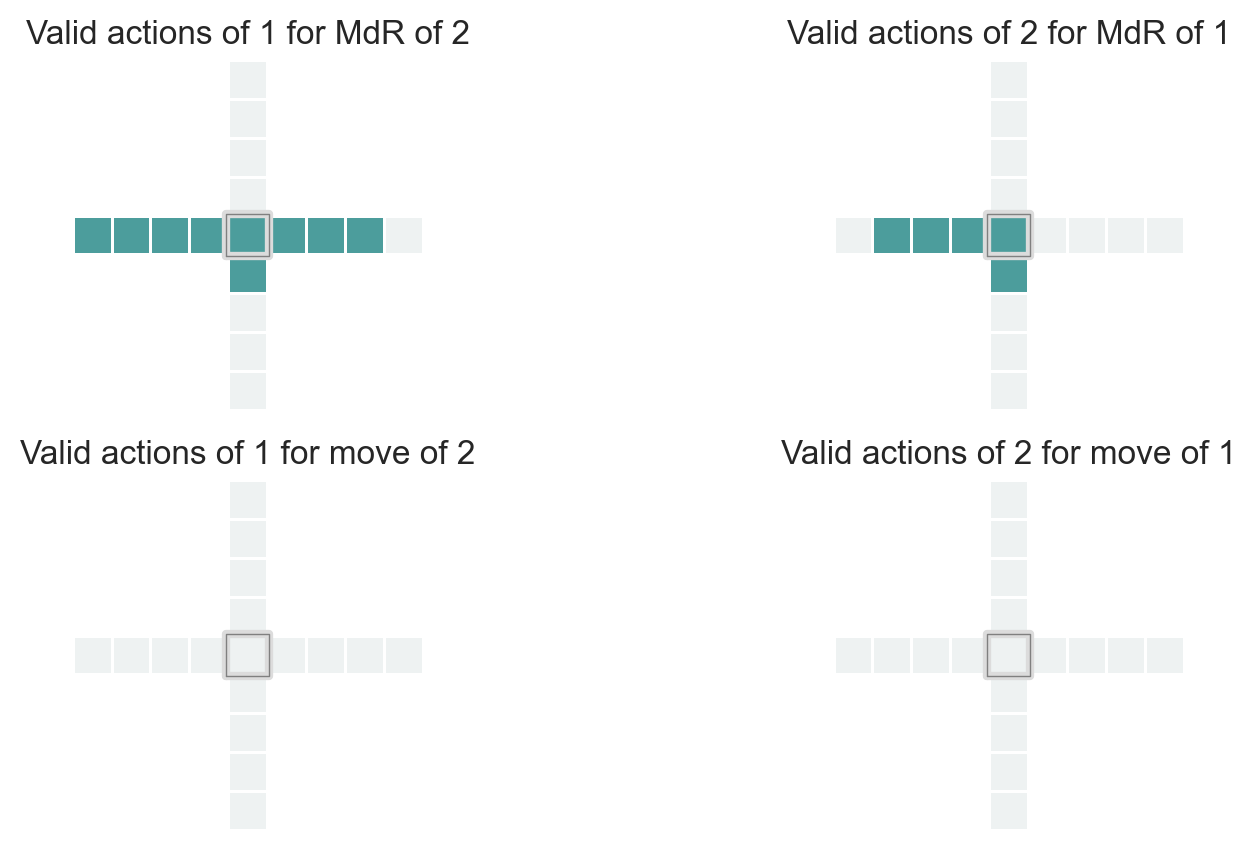

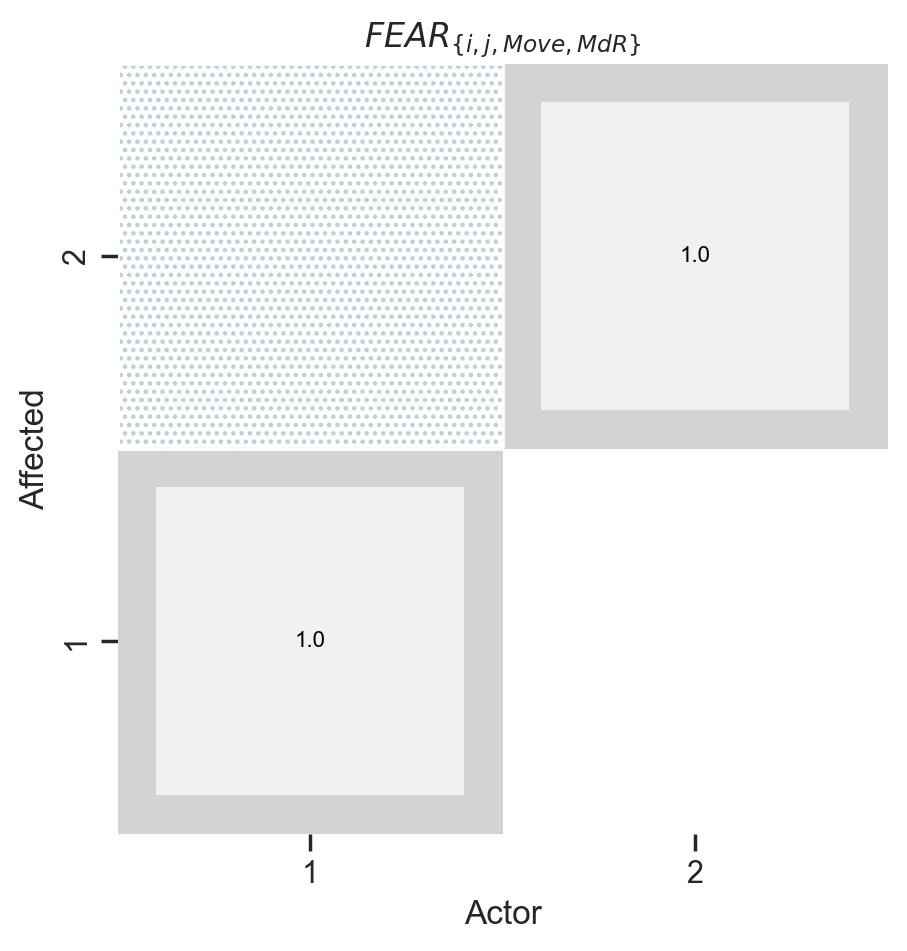

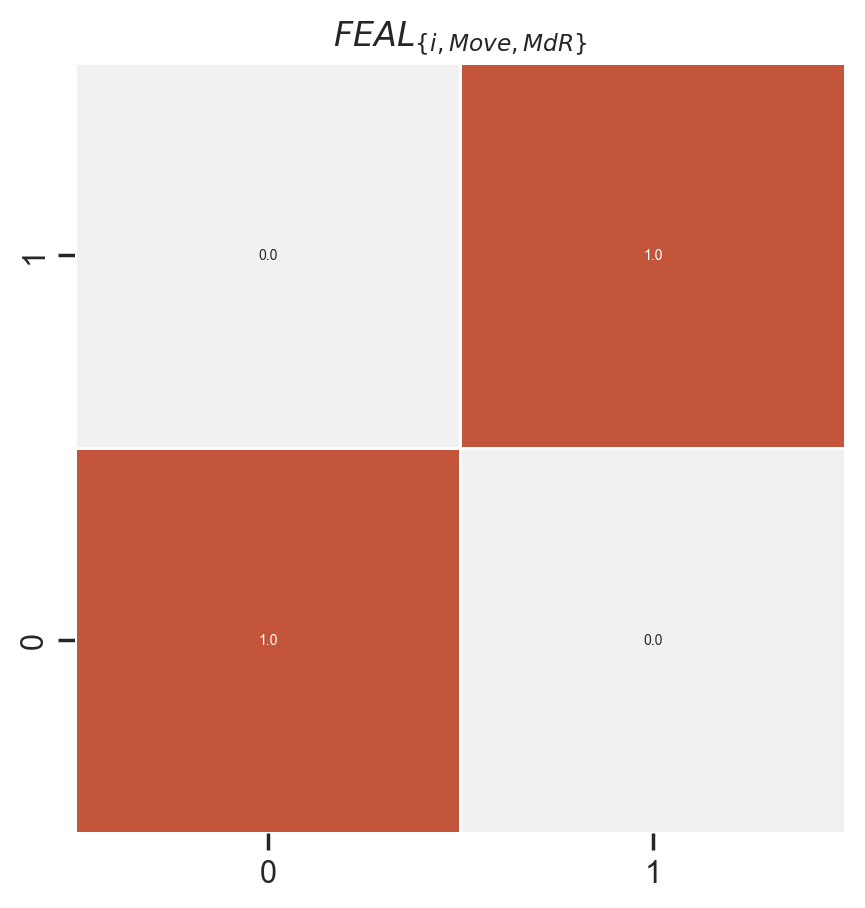

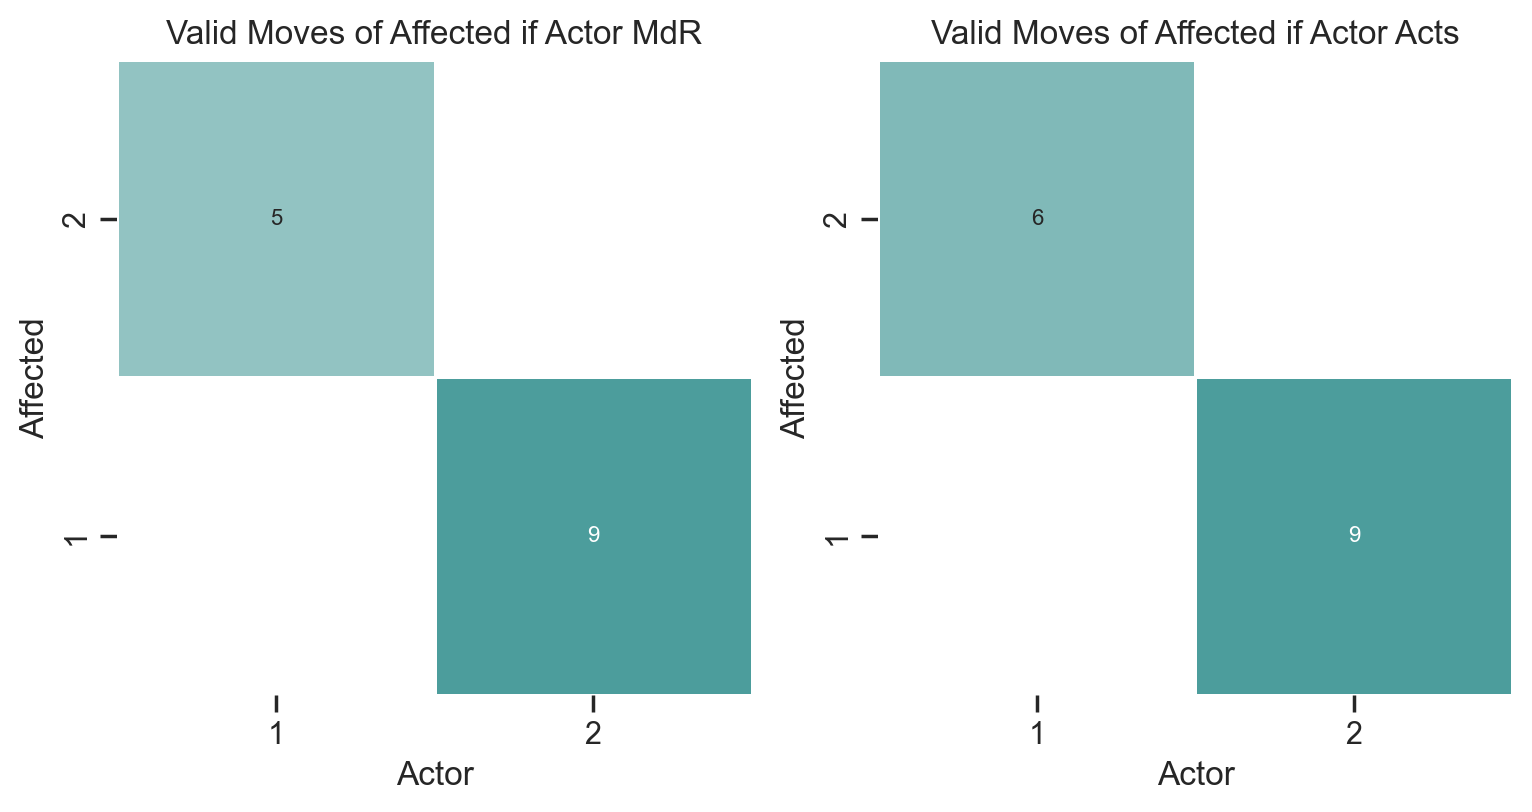

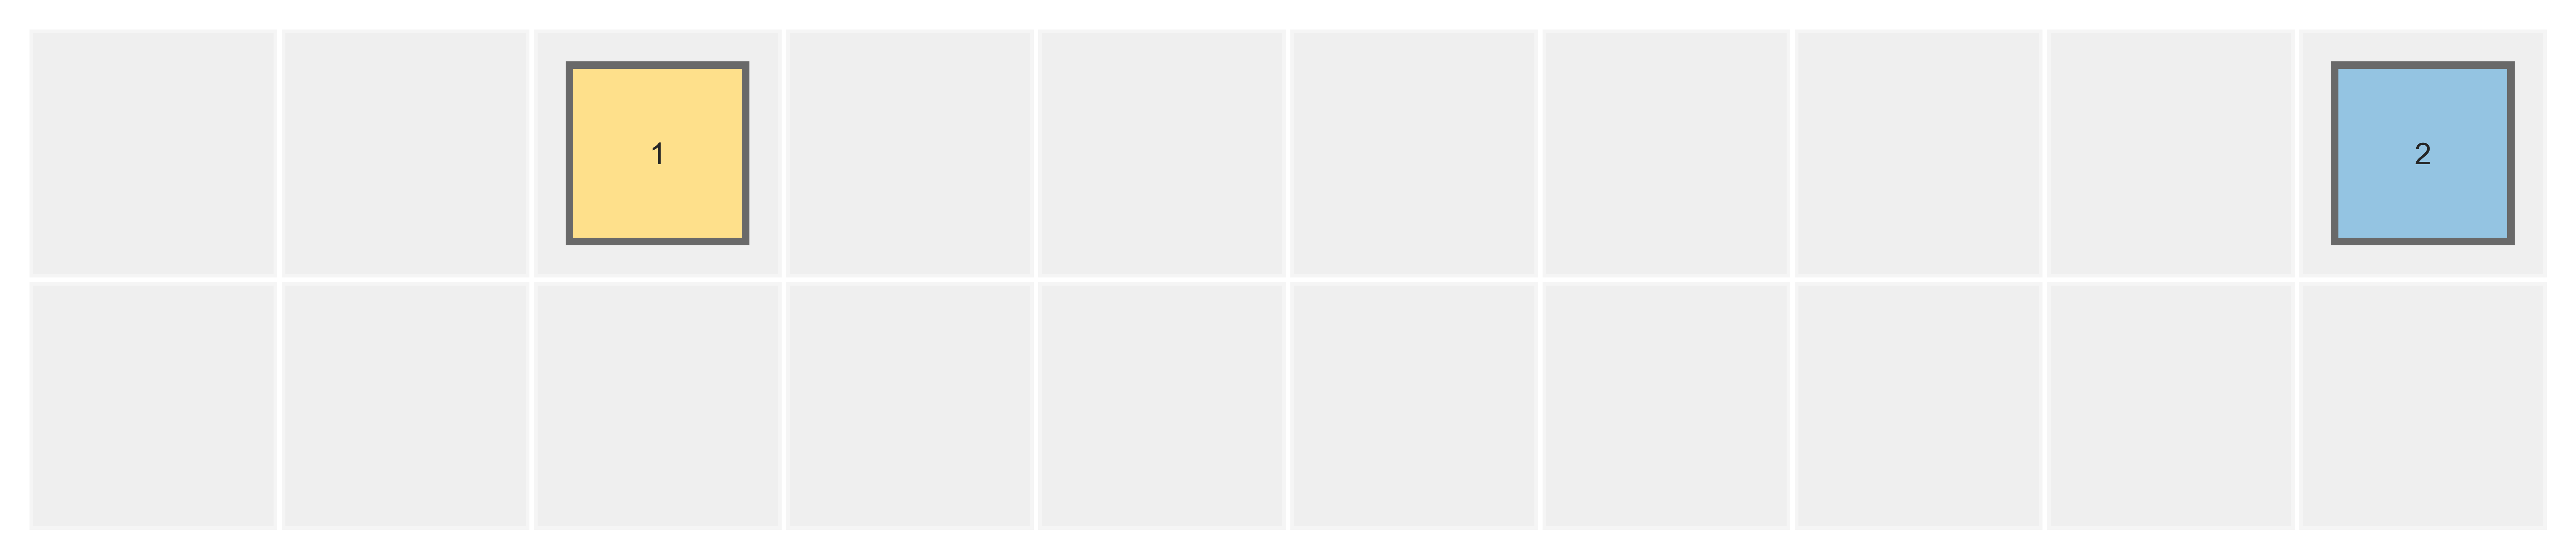

SpecificAction4Agents : []
MdR4Agents :  [[0, 0], [1, 0]]
MdRs:  S0-S0
Instance :  Instance_2
---------------------------------------------

SpecificAction Inputs 4Agents : []
Actions chosen for Agents : [(0, 7), (1, 11)]


100%|████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 362.66it/s]


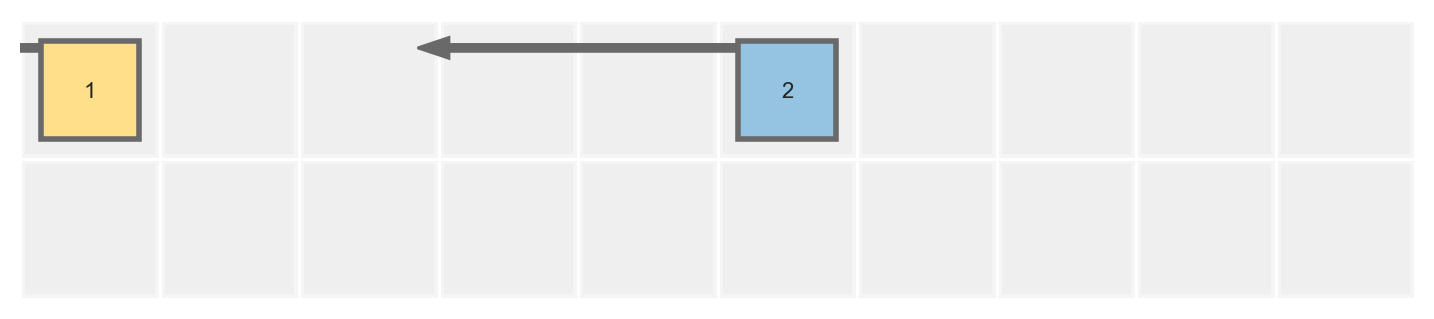

Agent: 1 Action Left2 7
Agent: 2 Action Left3 11


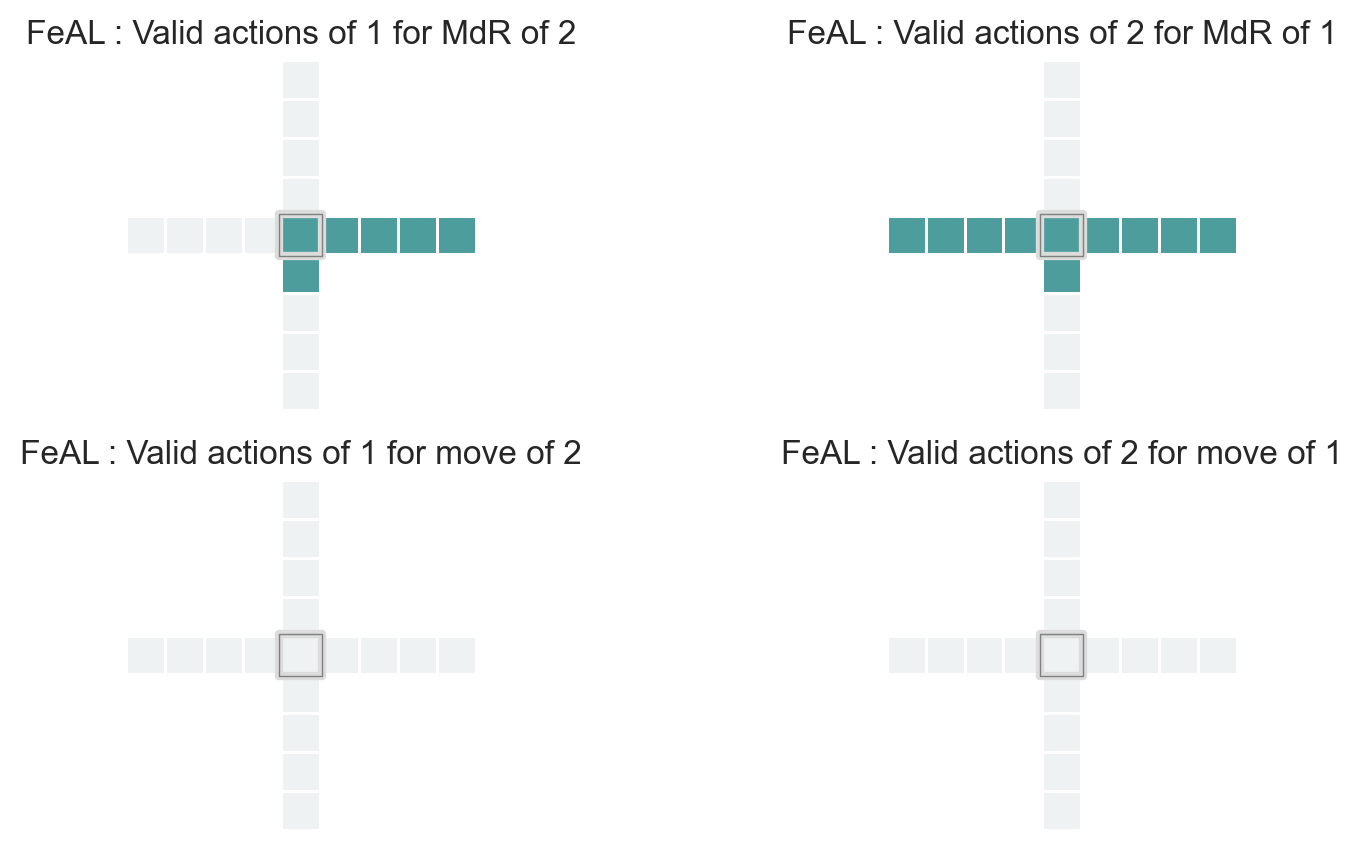

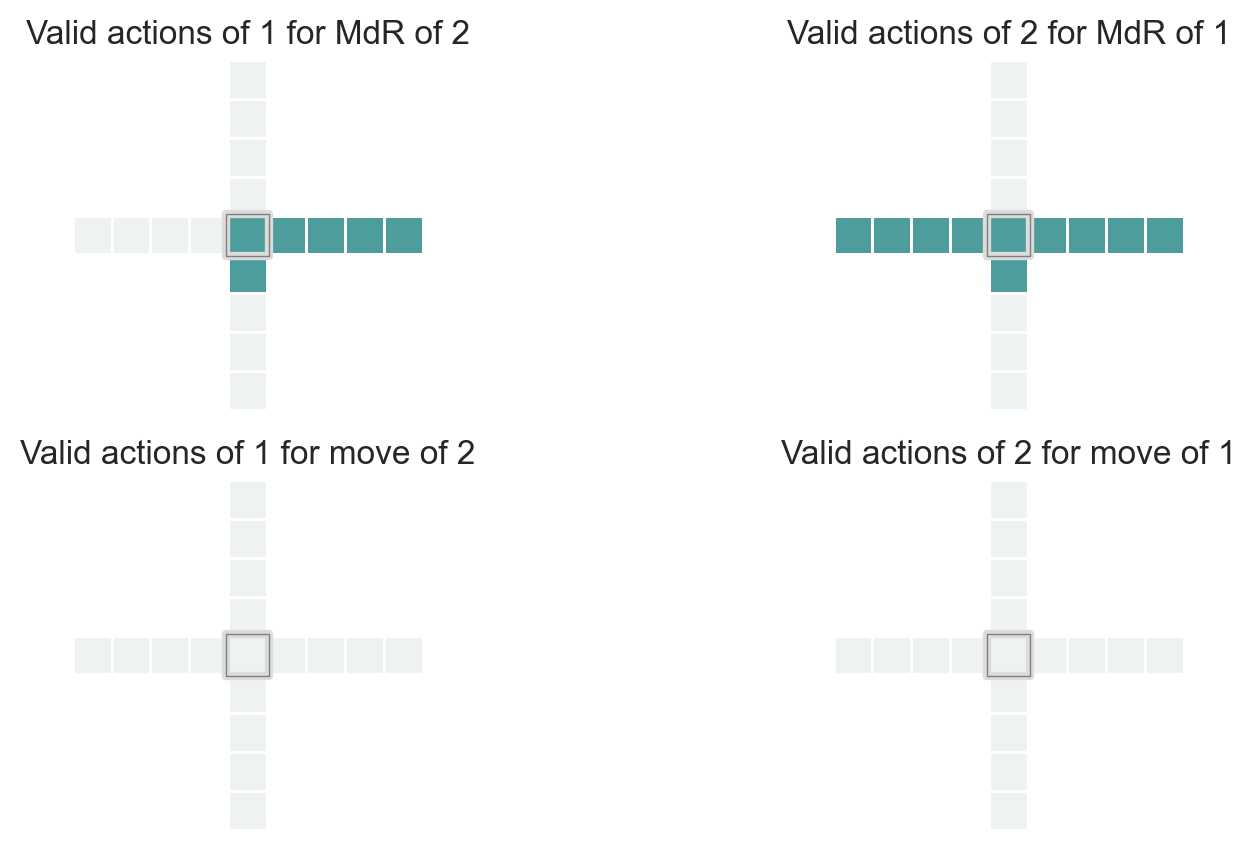

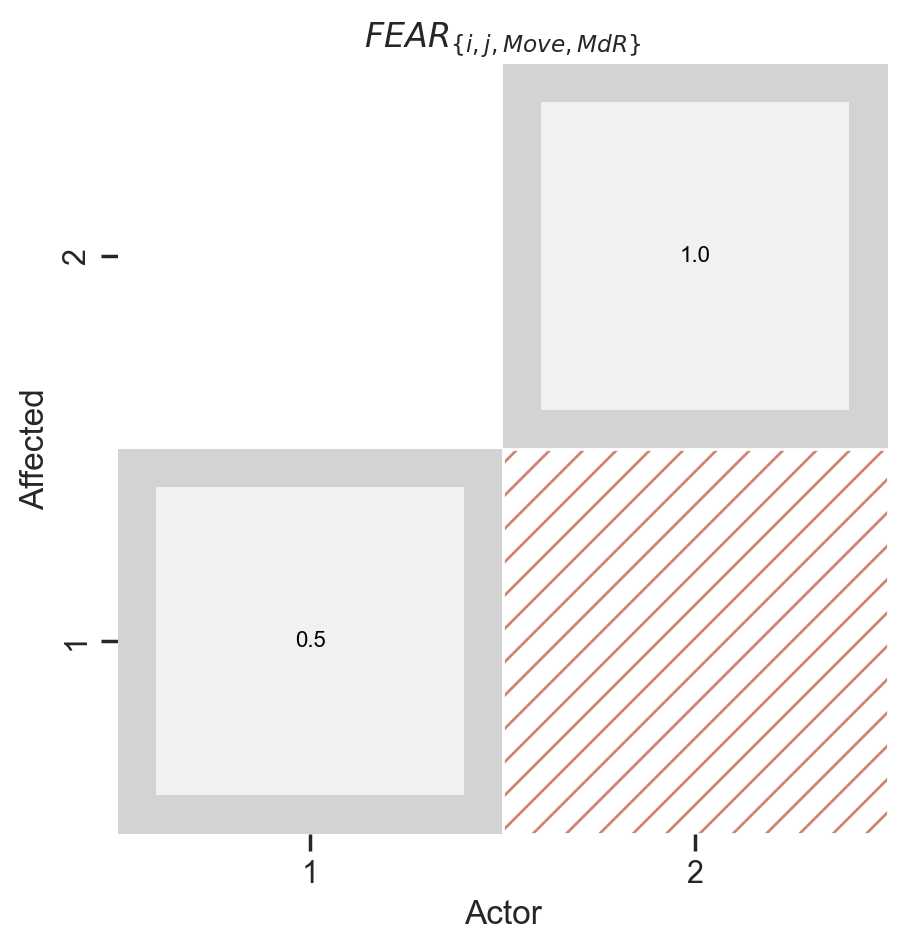

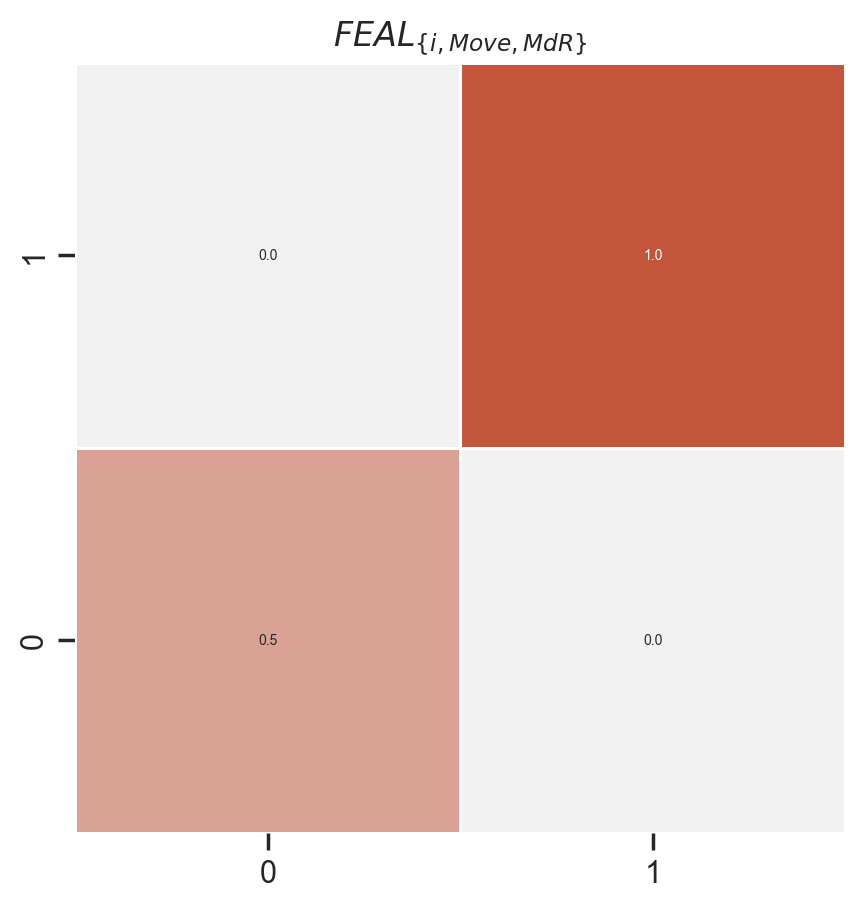

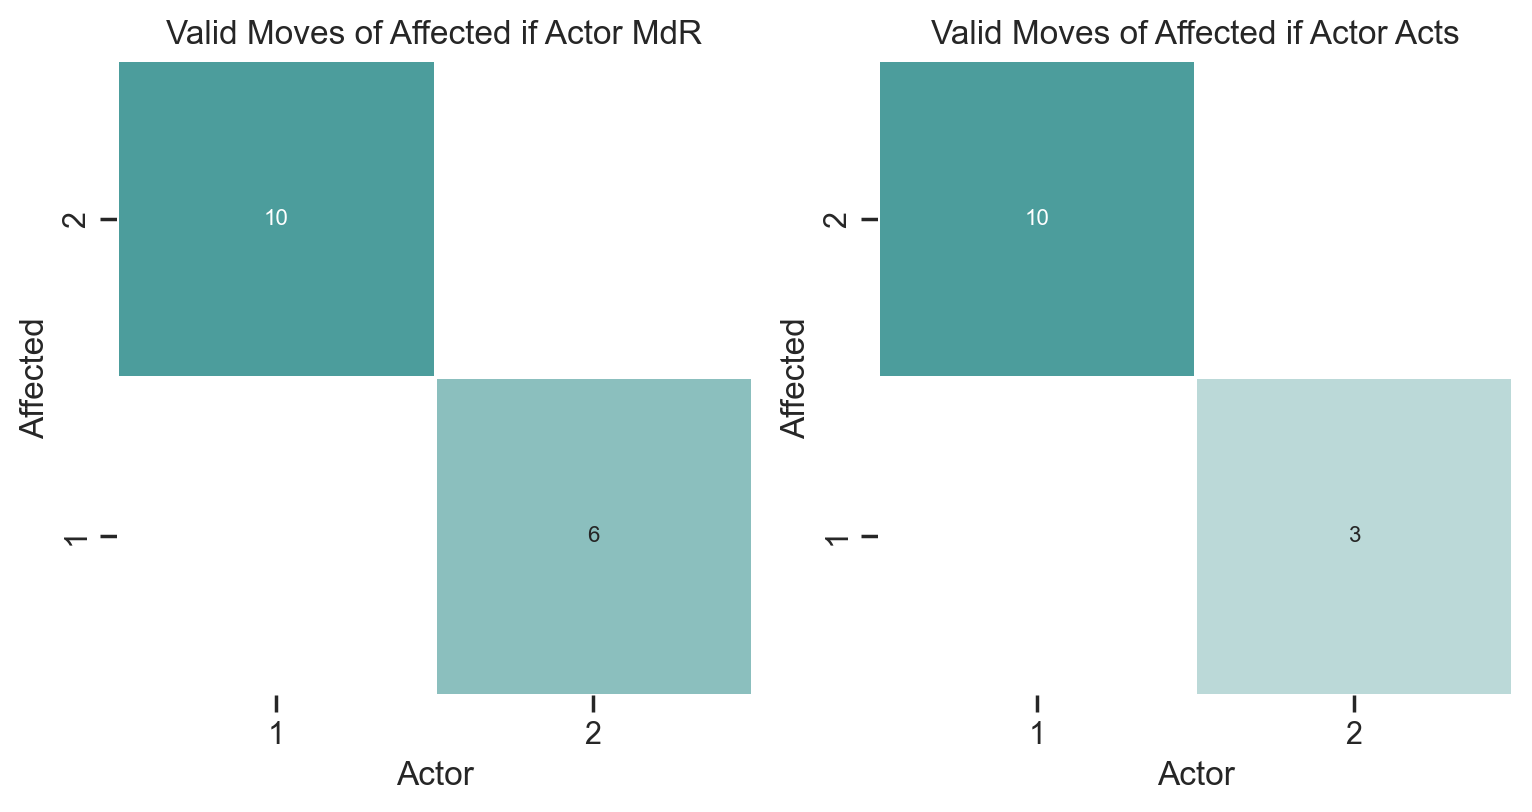

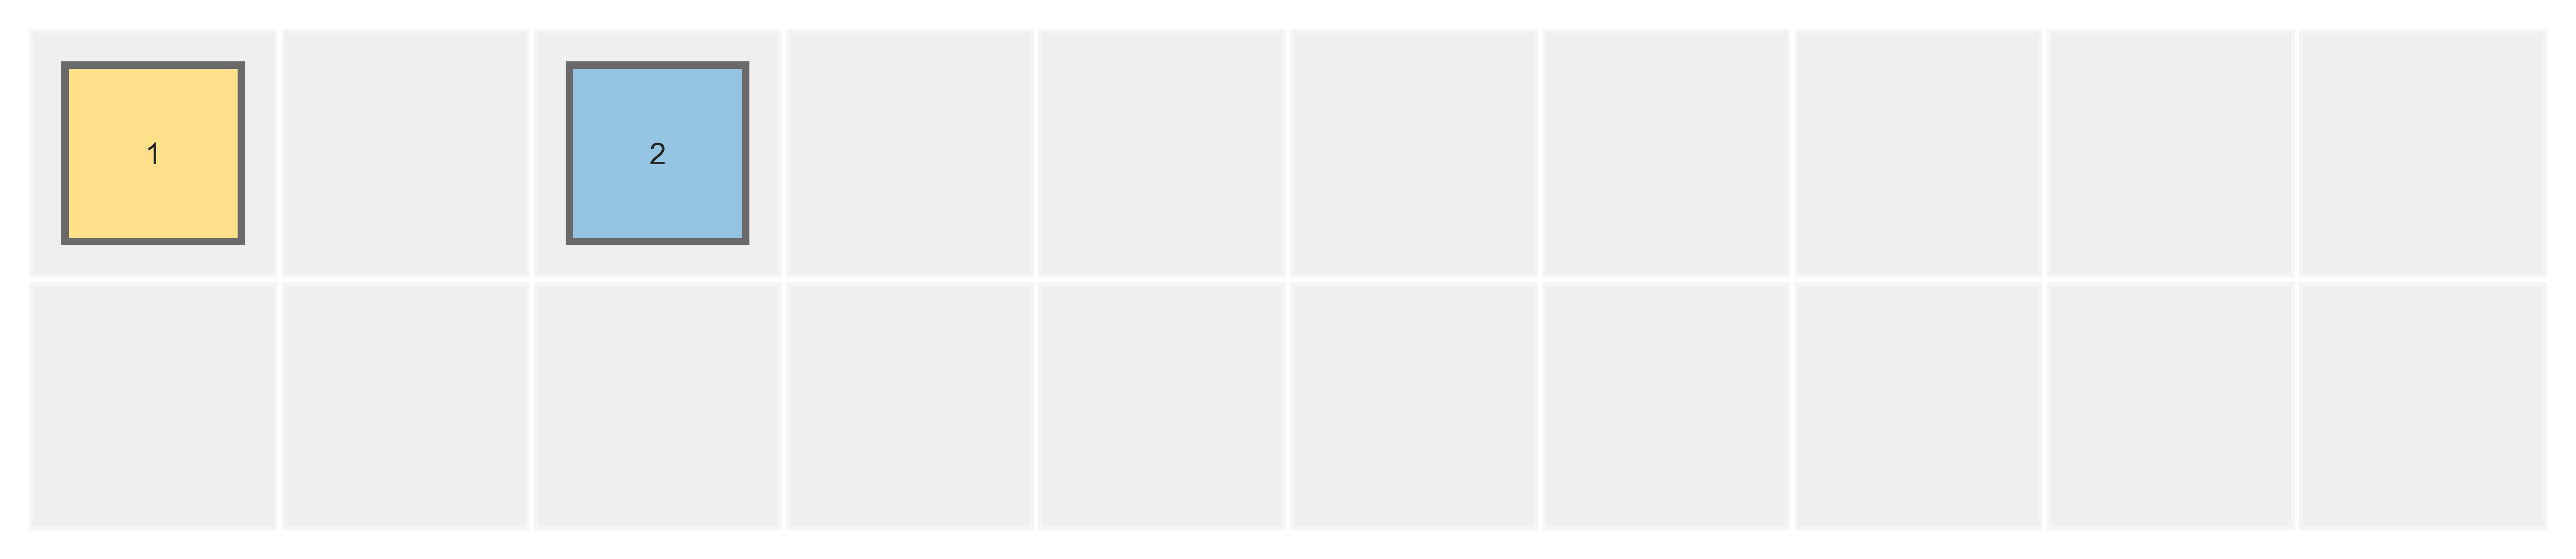

SpecificAction4Agents : []
MdR4Agents :  [[0, 0], [1, 0]]
MdRs:  S0-S0
Instance :  Instance_3
---------------------------------------------

SpecificAction Inputs 4Agents : []
Actions chosen for Agents : [(0, 7), (1, 16)]


100%|████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 500.30it/s]


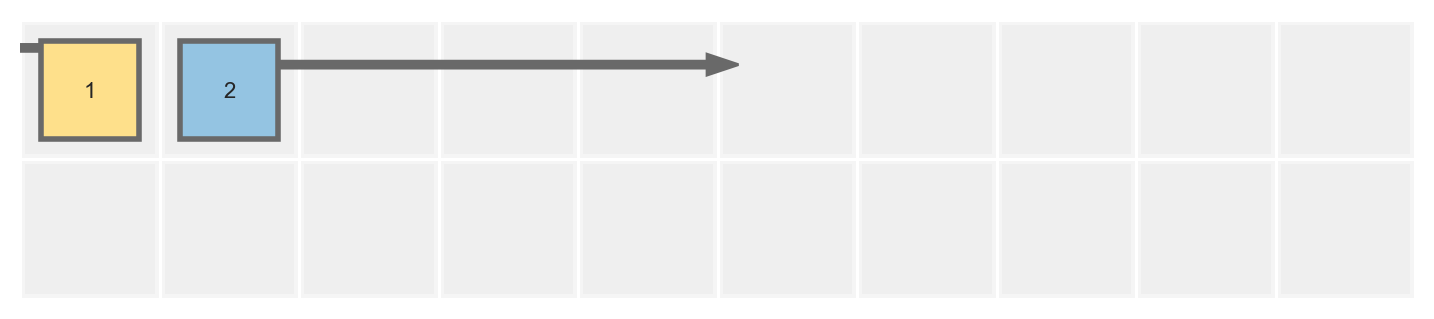

Agent: 1 Action Left2 7
Agent: 2 Action Right4 16


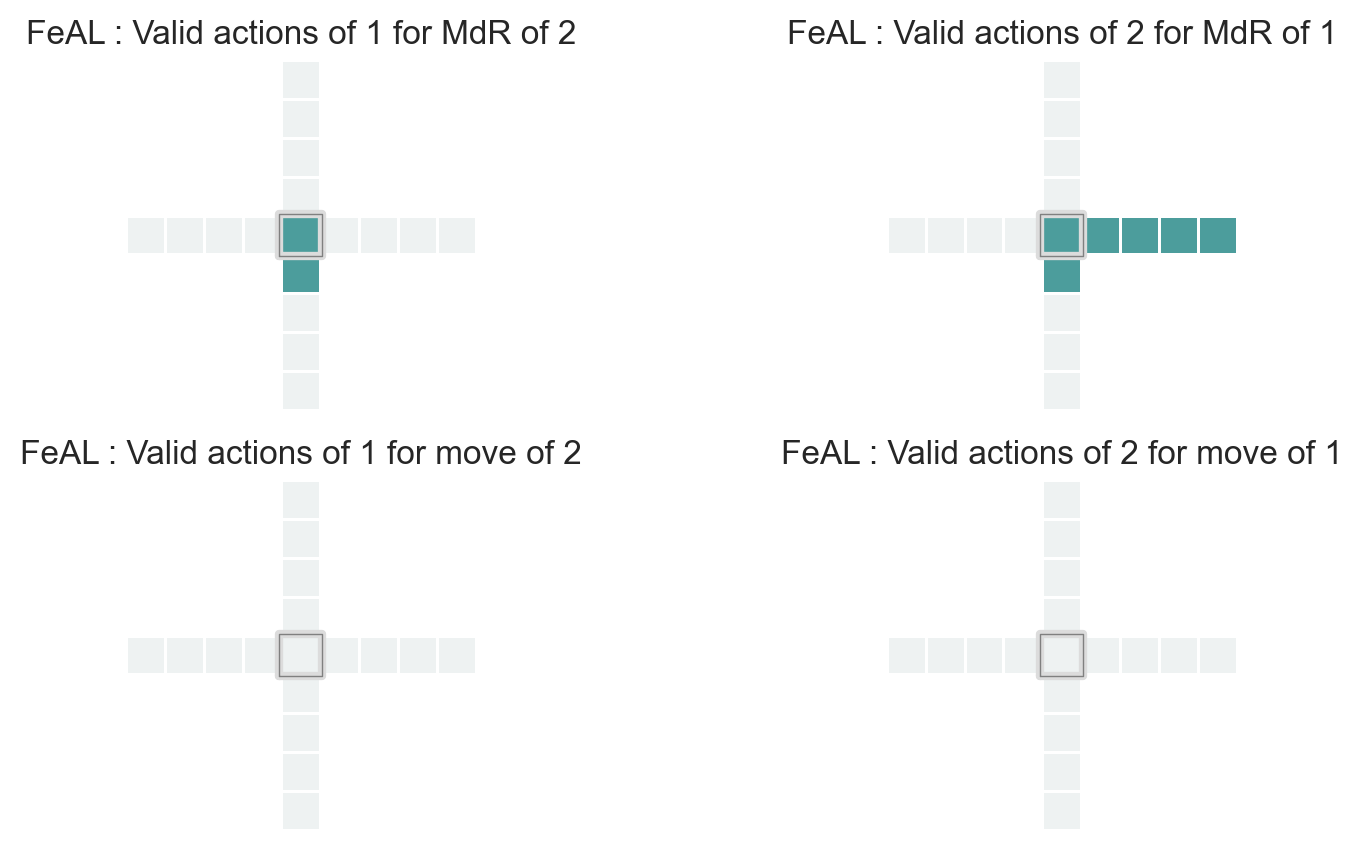

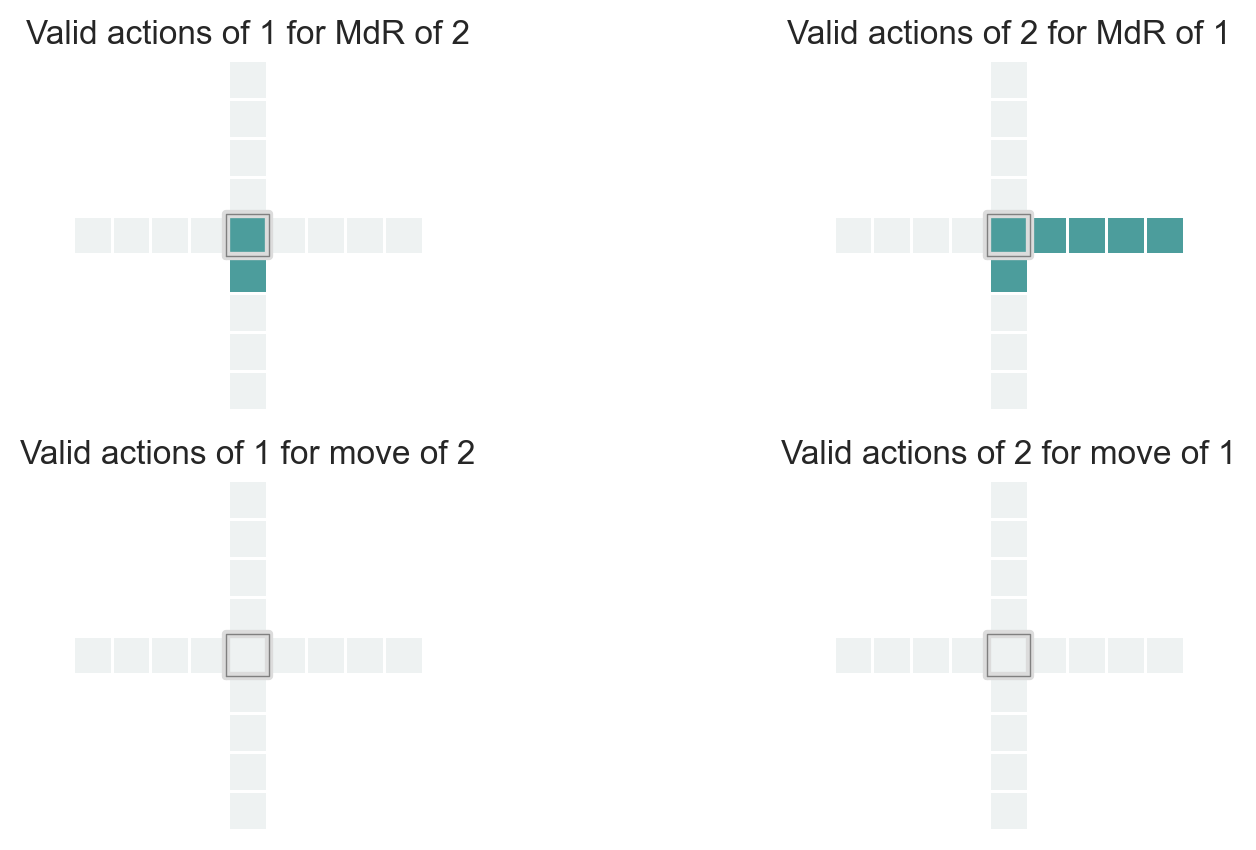

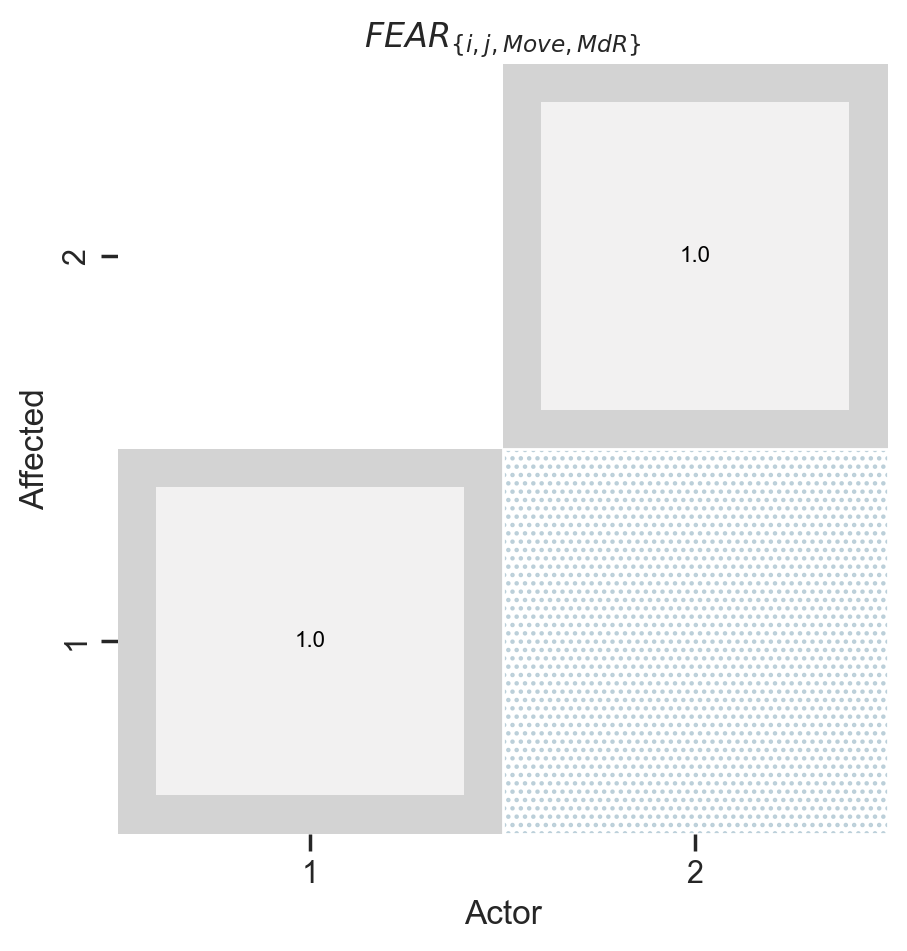

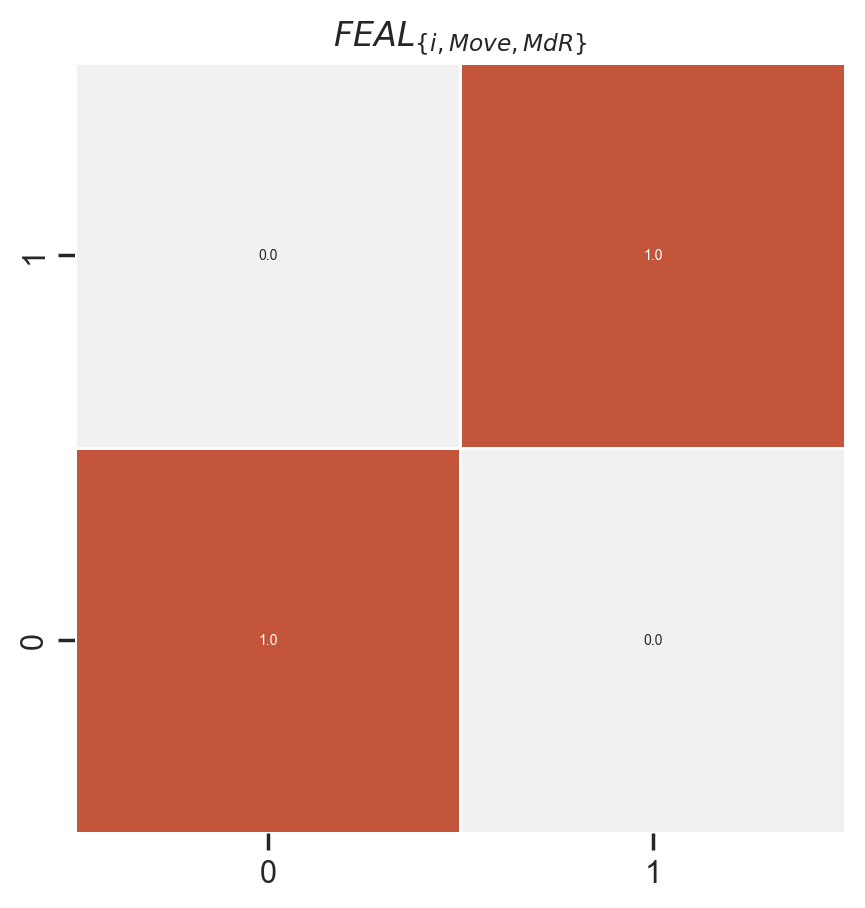

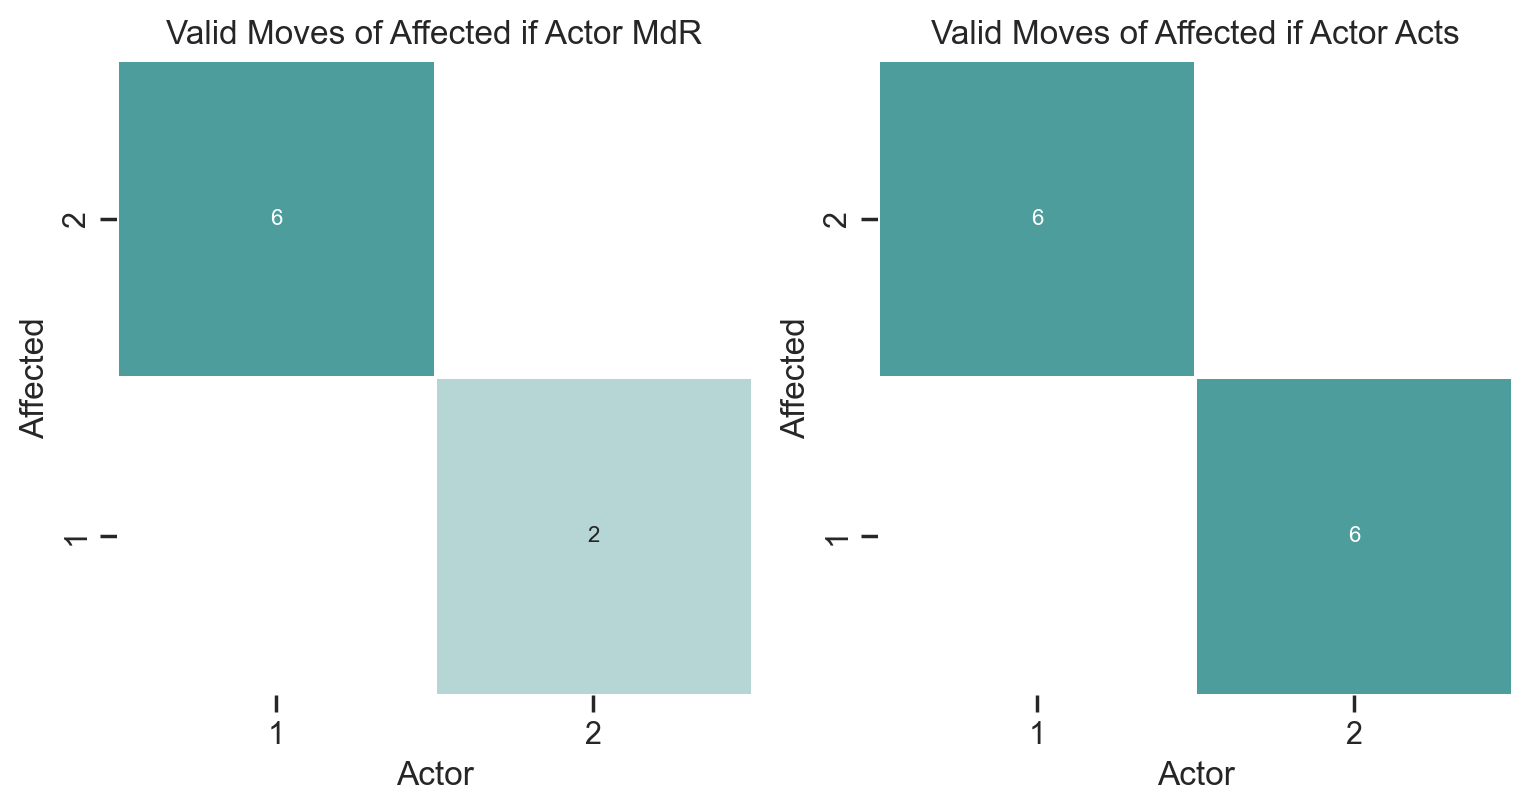

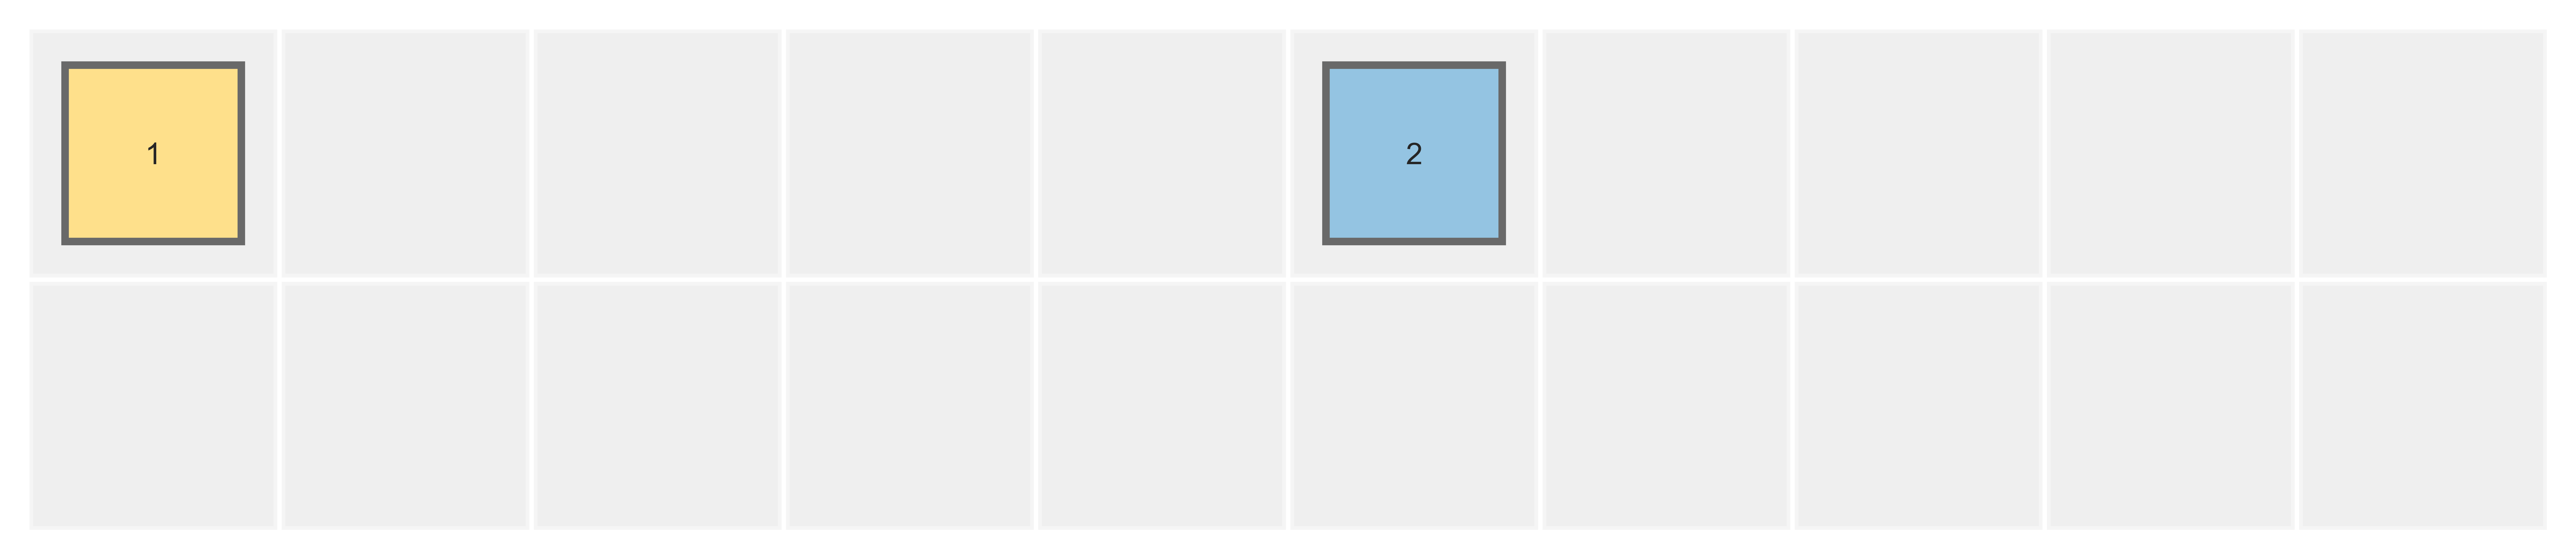

SpecificAction4Agents : []
MdR4Agents :  [[0, 0], [1, 0]]
MdRs:  S0-S0
Instance :  Instance_4
---------------------------------------------

SpecificAction Inputs 4Agents : []
Actions chosen for Agents : [(0, 16), (1, 7)]


100%|████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.16it/s]


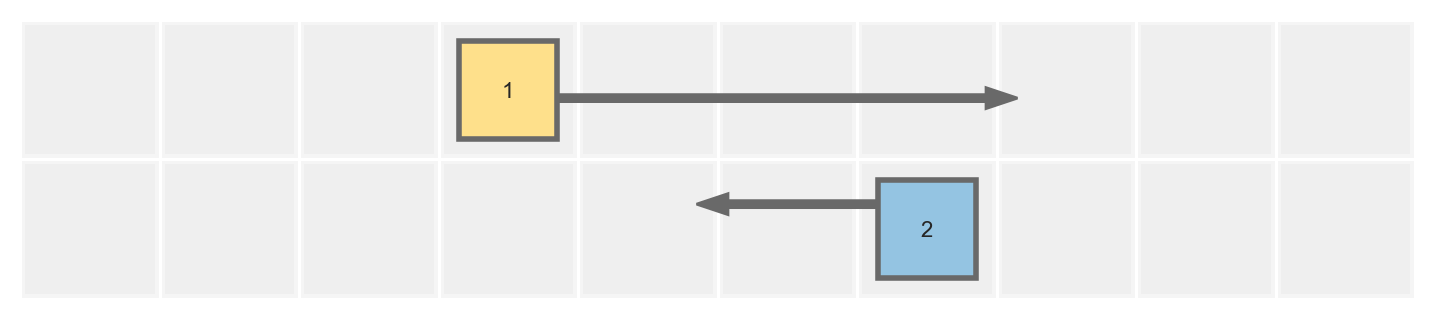

Agent: 1 Action Right4 16
Agent: 2 Action Left2 7


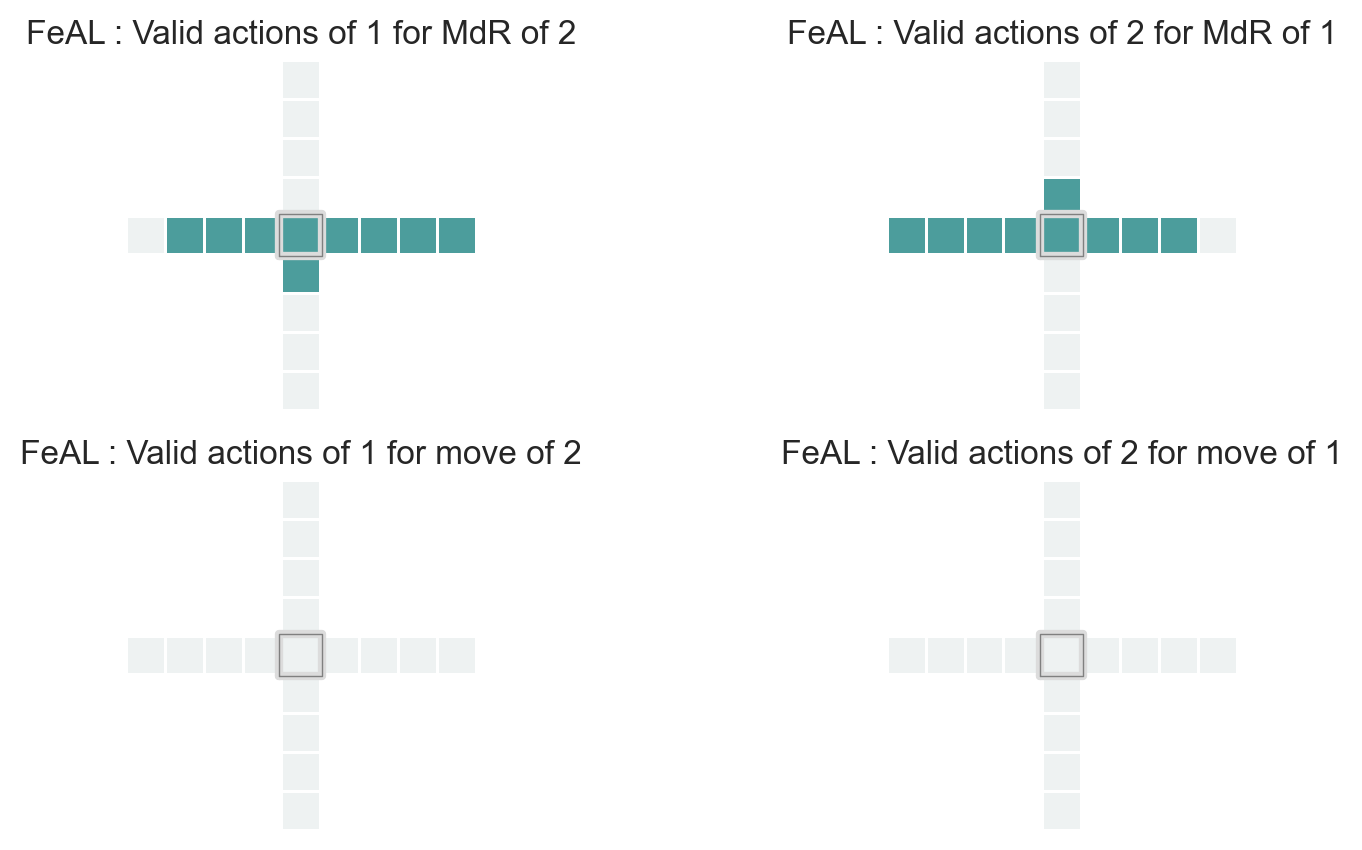

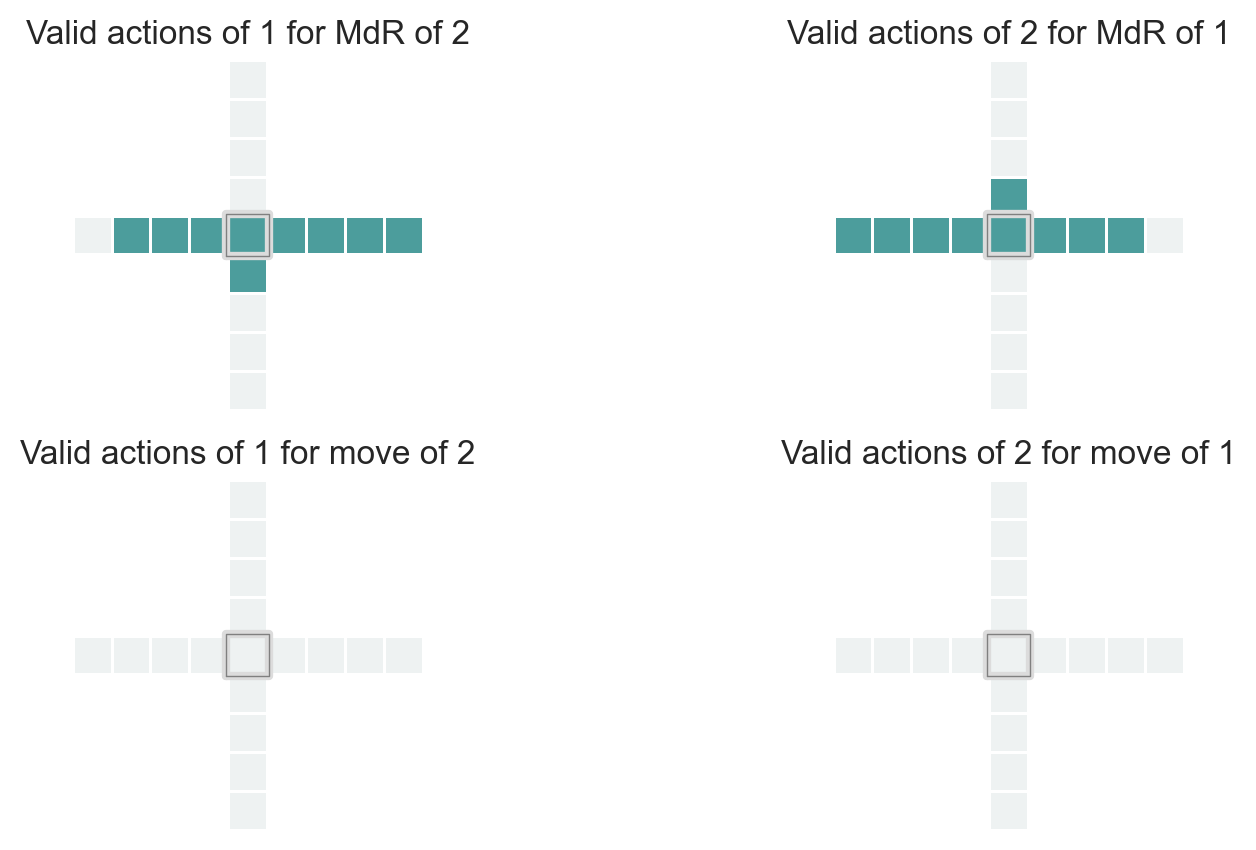

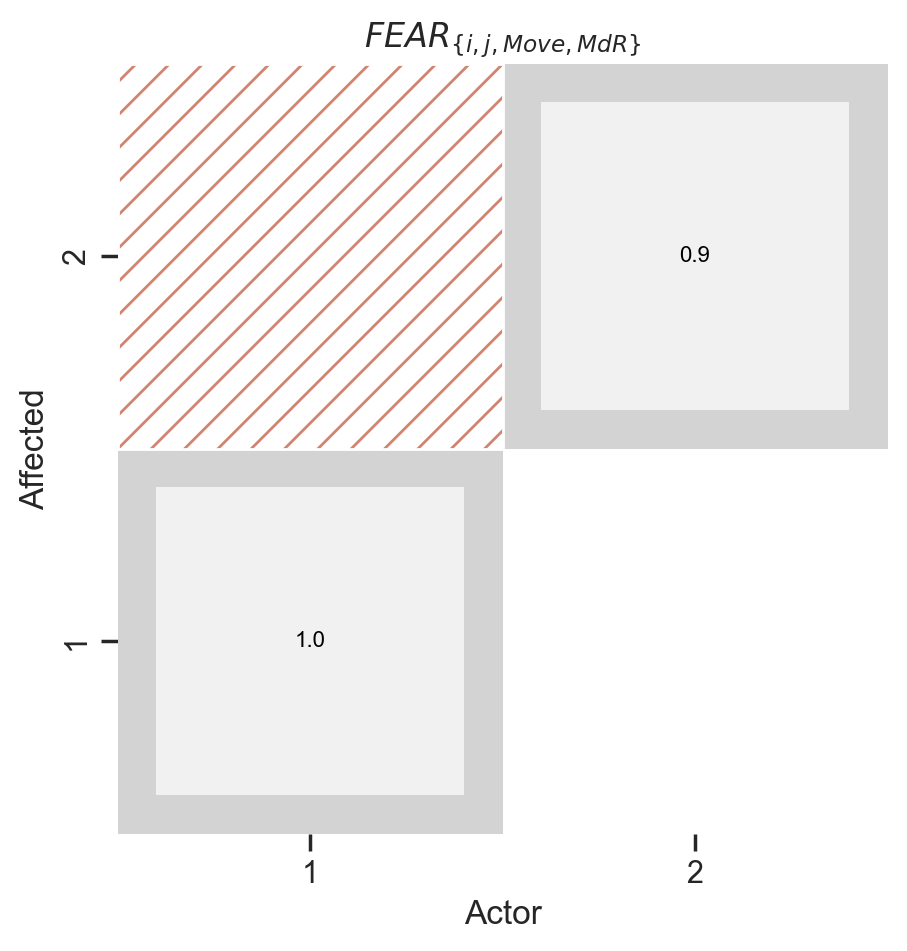

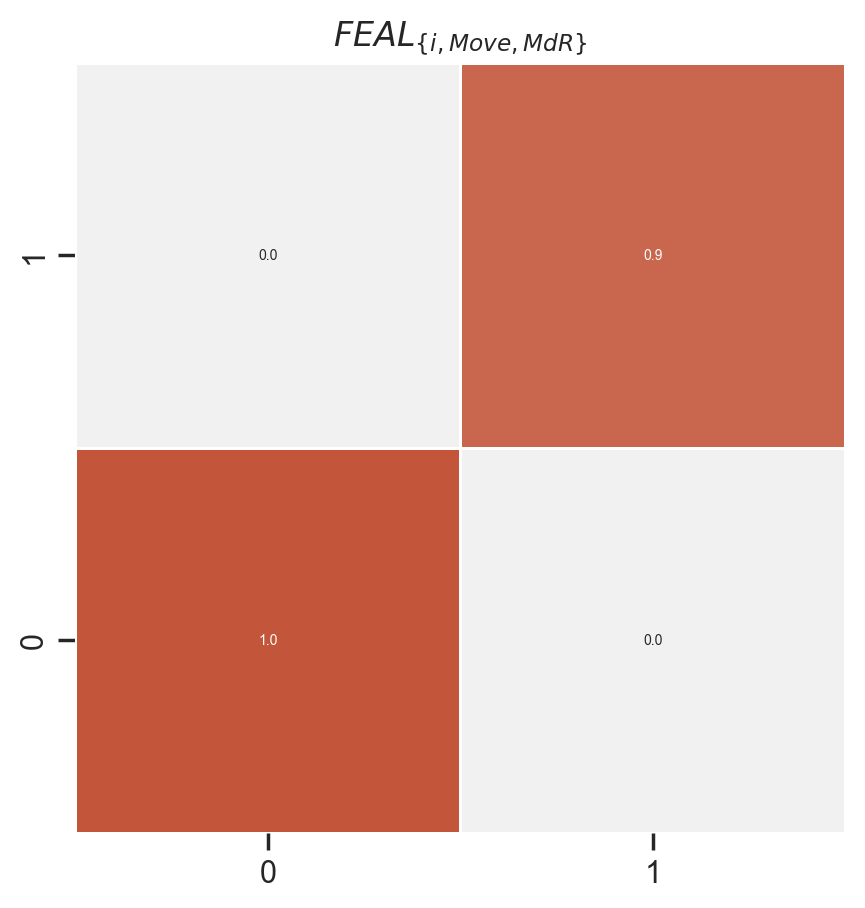

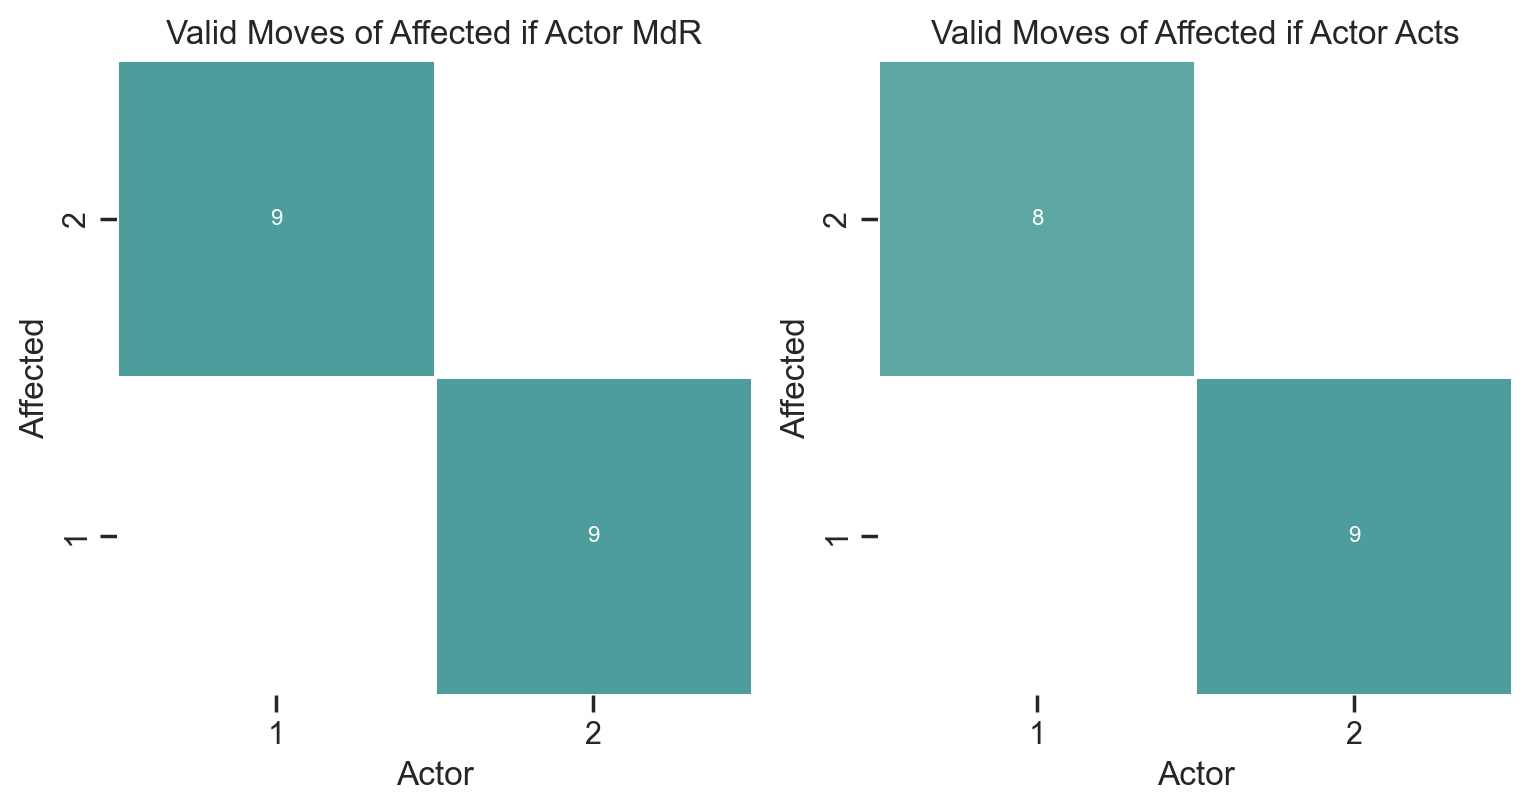

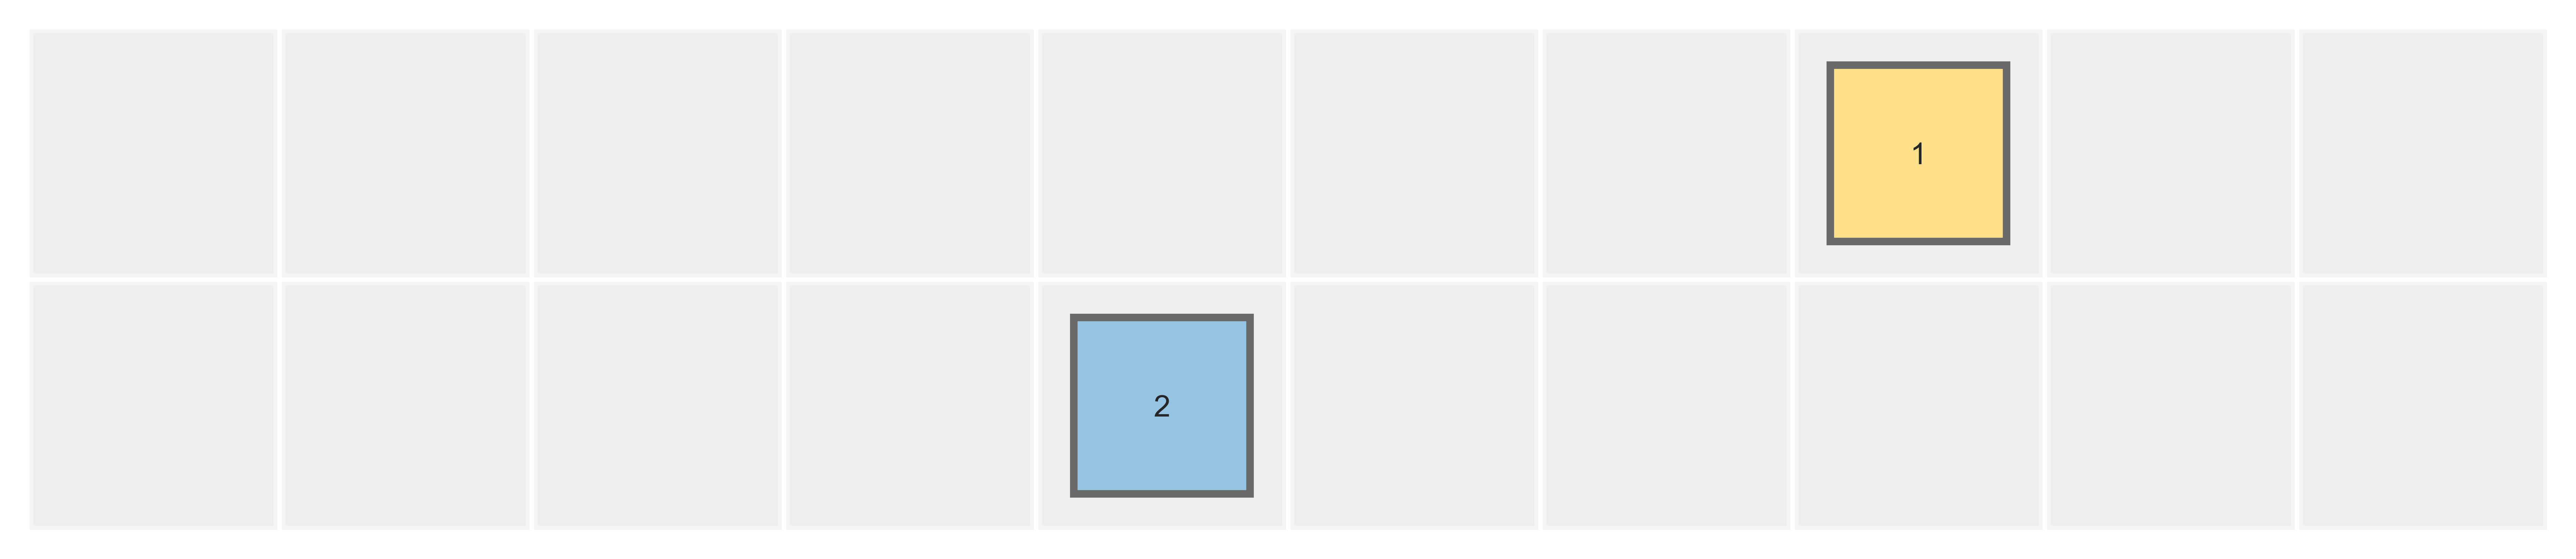

In [10]:
# Runnning Simulation Cases !
maxCaseDigits = np.ceil(np.log10(N_Cases*N_iterations)).astype(int)

for jj in range(N_Cases):


    # Initialising World Map

    Region = np.array(Scenario['Map']['Region'])
    Walls = Scenario['Map']['Walls']
    OneWays = Scenario['Map']['OneWays']


    World = GWorld.GWorld(Region, Walls= Walls, OneWays = OneWays) # Initialising GWorld from Matrix A

    AgentLocations = Scenario['AgentLocations'].copy()
    
    
    AgentLocations = []
    for location in Scenario['AgentLocations']:
        AgentLocations.append(tuple(location))
    
    # Adding N Agents at sorted random positions
    if len(AgentLocations) < N_Agents:
        [locX,locY] = np.where(Region==1)

        LocIdxs = rng.choice(locX.shape[0], size=(N_Agents-len(AgentLocations)), replace=False, shuffle=False)
        LocIdxs.sort()

        for Idx in LocIdxs:
            AgentLocations.append((locX[Idx],locY[Idx]))

    # Adding Agents
    PreviousAgentAdded = True
    for location in AgentLocations:
        # Adding new Agents if Previous Agent was Added to the World
        if PreviousAgentAdded: 
            Ag_i = Agent.Agent()
        PreviousAgentAdded = World.AddAgent(Ag_i,location, printStatus=False)

    PreviousAgentAdded = True
    while len(World.AgentList) < N_Agents:
        # Adding new Agents if Previous Agent was Added to the World
        if PreviousAgentAdded: 
            Ag_i = Agent.Agent()
        Loc_i = (np.random.randint(Region.shape[0]),np.random.randint(Region.shape[1]))
        PreviousAgentAdded = World.AddAgent(Ag_i,Loc_i, printStatus=False)


    # Action Selection for Agents

    defaultAction = Scenario['defaultAction']
    
    if ExhaustiveActions:
        SpecificAction4Agents = []
        actions4agents = actions4agents_mesh[jj]
        for agent in range(N_Agents):
            SpecificAction4Agents.append((agent,actions4agents[agent]))
    else:
        SpecificAction4Agents = Scenario['SpecificAction4Agents']
        
    print('SpecificAction4Agents :',SpecificAction4Agents)


    #------------------------------------------------------------------------------------------------------------------

    # Setting Policy for all Agents

    # The default Step and Direction Weights
    StepWeights=Scenario['StepWeights']
    DirectionWeights=Scenario['DirectionWeights']

    ListOfStepWeights = []
    ListOfDirectionWeights = []

    for ii in range(len(World.AgentList)):
        ListOfStepWeights.append(StepWeights)
        ListOfDirectionWeights.append(DirectionWeights)


    # Updating the list of stepweights based on specific weights for agents    
    for agentIDs,stepweights4agents in Scenario['SpecificStepWeights4Agents']:
        for agentID in agentIDs:
            ListOfStepWeights[agentID] = stepweights4agents

    # Updating the list of directionweights based on specific weights for agents            
    for agentIDs,directionweights4agents in Scenario['SpecificDirectionWeights4Agents']:
        for agentID in agentIDs:
            ListOfDirectionWeights[agentID] = directionweights4agents

    # Updating Agent Policies in World   
    for ii,agent in enumerate(World.AgentList):
        policy = Agent.GeneratePolicy(StepWeights=ListOfStepWeights[ii],DirectionWeights=ListOfDirectionWeights[ii])
        agent.UpdateActionPolicy(policy)

    #------------------------------------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------------------------------------


    # Move de Rigueur
   
    # MdR4Agents = [[1,4]]
    MdR4Agents = []

    #Setting the MdR for each Agent
    for ii in range(len(World.AgentList)):
        MdR4Agents.append([ii, MdR4Agents_Default])
        
    for agent,specific_mdr in Specific_MdR4Agents:
        MdR4Agents[agent] = [agent, specific_mdr]

    print('MdR4Agents : ',MdR4Agents)
    mdr_string = FeARUI.get_mdr_string(MdR4Agents, return_names=True)
    print('MdRs: ', mdr_string)

    #------------------------------------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------------------------------------

    for kk in range(N_iterations): 
    
        InstanceID = 'Instance_' + str(jj*N_iterations+kk).zfill(maxCaseDigits)
        print('Instance : ',InstanceID)
        print('---------------------------------------------\n')

        #------------------------------------------------------------------------------------------------------------------

        # Responsibility

        # Select Actions for Agents based on defaultAction and SpecificAction4Agents
        Action4Agents = World.SelectActionsForAll(defaultAction = defaultAction,InputActionID4Agents = SpecificAction4Agents)
        print('SpecificAction Inputs 4Agents :',SpecificAction4Agents)
        print('Actions chosen for Agents :',Action4Agents)



        # Calculate Responsibility Metric for the chosen Actions
        FeAR,ValidMoves_MdR,ValidMoves_action1,ValidityOfMoves_Mdr,ValidityOfMoves_action1 = Responsibility.FeAR(World, Action4Agents,MdR4Agents) 
        FeAL, ValidMoves_moveDeRigueur_FeAL, ValidMoves_action_FeAL, \
           ValidityOfMoves_Mdr_FeAL, ValidityOfMoves_action_FeAL = Responsibility.FeAL(World, Action4Agents,MdR4Agents)
            


        #------------------------------------------------------------------------------------------------------------------
        #------------------------------------------------------------------------------------------------------------------

        # Plot results

        if ShowPlots4Instance == True:


            # Plotting the State of the World and Chosen Actions for the next iteration
            plotgw.ViewGWorld(World,ViewNextStep = True,ViewActionTrail=False)
            
            
            if N_Agents == 2: 
                fig,axs = plt.subplots(2,2)

                PlotGWorld.plot_valid_actions(ValidityOfMoves_Mdr_FeAL[0], title='FeAL : Valid actions of 1 for MdR of 2', ax=axs[0,0])
                PlotGWorld.plot_valid_actions(ValidityOfMoves_Mdr_FeAL[1], title='FeAL : Valid actions of 2 for MdR of 1', ax=axs[0,1])
                PlotGWorld.plot_valid_actions(-ValidityOfMoves_action_FeAL[0], title='FeAL : Valid actions of 1 for move of 2', ax=axs[1,0])
                PlotGWorld.plot_valid_actions(-ValidityOfMoves_action_FeAL[1], title='FeAL : Valid actions of 2 for move of 1', ax=axs[1,1])

                fig,axs = plt.subplots(2,2)

                PlotGWorld.plot_valid_actions(ValidityOfMoves_Mdr[1][0], title='Valid actions of 1 for MdR of 2', ax=axs[0,0])
                PlotGWorld.plot_valid_actions(ValidityOfMoves_Mdr[0][1], title='Valid actions of 2 for MdR of 1', ax=axs[0,1])
                PlotGWorld.plot_valid_actions(-ValidityOfMoves_action1[1][0], title='Valid actions of 1 for move of 2', ax=axs[1,0])
                PlotGWorld.plot_valid_actions(-ValidityOfMoves_action1[0][1], title='Valid actions of 2 for move of 1', ax=axs[1,1])


            for AgentID,ActionID in Action4Agents:
                print('Agent:',AgentID+1,'Action',ActionNames[ActionID],ActionID)


            # Showing the Responsibility Metric
            PlotGWorld.plotResponsibility(FeAR, FeAL=FeAL);
            plt.title('$FEAR_{\{ i,j,Move,MdR\}}$')
            
            # Showing the Responsibility Metric
            FeAL_matrix = np.zeros((N_Agents,N_Agents))
            for xx in range(N_Agents):
                FeAL_matrix[xx][xx]=FeAL[xx]
            PlotGWorld.plotMatrix(FeAL_matrix);
            plt.title('$FEAL_{\{ i,Move,MdR\}}$')
            plt.show()
         
            fig,axs = plt.subplots(1,2)
    
            PlotGWorld.plotCounts(ValidMoves_MdR,title='Valid Moves of Affected if Actor MdR', ax=axs[0], cbar=False)
            PlotGWorld.plotCounts(ValidMoves_action1,title='Valid Moves of Affected if Actor Acts', ax=axs[1], cbar=False)
            
            plt.show()

        #------------------------------------------------------------------------------------------------------------------
        #------------------------------------------------------------------------------------------------------------------
         
        
        # Saving Records of Case Results

        # Instance Records
        Instance = {
            'AgentLocations': np.array(World.AgentLocations).tolist(),
            'Action4Agents': np.array(Action4Agents).tolist(),
            'MdR4Agents': MdR4Agents,
            'FeAR': FeAR.tolist(),
            'ValidMoves_MdR': ValidMoves_MdR.tolist(),
            'ValidMoves_action1': ValidMoves_action1.tolist(),
            'ValidityOfMoves_Mdr': ValidityOfMoves_Mdr.tolist(),
            'ValidityOfMoves_action1':ValidityOfMoves_action1.tolist(),
            'FeAL':FeAL.tolist(),
            'ValidMoves_moveDeRigueur_FeAL':ValidMoves_moveDeRigueur_FeAL.tolist(),
            'ValidMoves_action_FeAL':ValidMoves_action_FeAL.tolist(),
            'ValidityOfMoves_Mdr_FeAL':ValidityOfMoves_Mdr_FeAL.tolist(),
            'ValidityOfMoves_action_FeAL':ValidityOfMoves_action_FeAL.tolist()
            
        }



        Record[InstanceID] = Instance
        
        # Update World with Selected Steps
        World.UpdateGWorld(ActionID4Agents=Action4Agents)
        
        # Plot updated state of GWorld
        if ShowPlots4Instance == True:
            plotgw.ViewGWorld(World,ViewActionArrows=False ,ViewActionTrail=False,saveFolder = SaveImagestoFolder) 

    del World

    #------------------------------------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------------------------------------


In [11]:
print(Record)

{'Scenario': {'AgentLocations': [], 'DirectionWeights': [0, 0, 1, 1], 'Map': {'OneWays': [], 'Region': [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], 'Walls': []}, 'N_Agents': 2, 'N_Cases': 5, 'N_iterations': 0, 'SpecificAction4Agents': [], 'SpecificDirectionWeights4Agents': [], 'SpecificStepWeights4Agents': [], 'StepWeights': [1, 1, 1, 1, 1], 'defaultAction': 'random'}, 'Instance_0': {'AgentLocations': [[1, 2], [1, 6]], 'Action4Agents': [[0, 8], [1, 12]], 'MdR4Agents': [[0, 0], [1, 0]], 'FeAR': [[0.0, 0.24999996875000394], [-0.1428571224489825, 0.0]], 'ValidMoves_MdR': [[0, 8], [7, 0]], 'ValidMoves_action1': [[0, 6], [8, 0]], 'ValidityOfMoves_Mdr': [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0]], [[1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]], 'ValidityOfMoves_action1': [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [12]:
# Translate Record to JSON

RecordJSON = json.loads(json.dumps(Record, indent=1, sort_keys=True))

pretty_Record_json = pprint.pformat(RecordJSON,width=150).replace("'", '"')
print(pretty_Record_json)


{"Instance_0": {"Action4Agents": [[0, 8], [1, 12]],
                "AgentLocations": [[1, 2], [1, 6]],
                "FeAL": [1.0, 0.7499999062500118],
                "FeAR": [[0.0, 0.24999996875000394], [-0.1428571224489825, 0.0]],
                "MdR4Agents": [[0, 0], [1, 0]],
                "ValidMoves_MdR": [[0, 8], [7, 0]],
                "ValidMoves_action1": [[0, 6], [8, 0]],
                "ValidMoves_action_FeAL": [8, 6],
                "ValidMoves_moveDeRigueur_FeAL": [7, 8],
                "ValidityOfMoves_Mdr": [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0]],
                                        [[1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]],
                "ValidityOfMoves_Mdr_FeAL": [[1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
                                             [1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0]],
      

In [13]:
# Save Records to JSON in Results folder

if SaveRecords:

    resultsFolder = 'Results'

    t = datetime.datetime.now()
    if ExhaustiveActions:
        recordFilename = t.strftime('%d-%m-%y %H-%M-%S ') + scenario_name + '_' + mdr_string + '_ex' + '.json'
    else:
        recordFilename = t.strftime('%d-%m-%y %H-%M-%S ') + scenario_name + '_' + mdr_string + '.json'
    

    recordpath = os.path.join(resultsFolder,recordFilename)

    print(recordpath)

    with open(recordpath, 'w') as f:
        f.write(pretty_Record_json)
        
print(MdR4Agents_Default)

0


```

























```
